In [1]:
from pandas import read_csv, to_datetime
import plotly.express as px
from numpy import  random
import seaborn as sns
import string
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

## Fonctions pour anonymiser les familles de produit

In [2]:
def index_to_letter(index):
    """
    Convertit un index en lettre, gestion des cas où 
    l'index est supérieur à 25 (a à z)
    """
    letters = string.ascii_uppercase
    result = []
    while index >= 0:
        result.append(letters[index % 26])
        index = index // 26 - 1
    return ''.join(reversed(result))

def anon_df(df,cols):
    """
    Retourne un dataframe avec un ensemble de colonnes anonymisées 
    Input: 
    df : le dataframe en entrée
    cols : la liste de colonne qu'on souhaite rendre anonyme 
    
    """
    # On va parcourir les colonnes de la liste de colonne cols voulue 
    # On lui affecte ensuite un numéro 
    
    for col_name in cols:
        keys = {cats: index_to_letter(index = i) for i, cats in enumerate(df[col_name].unique()) }
        df[col_name] = df[col_name].apply(lambda x:keys[x])
    #print(keys)
    return df

In [3]:
df1 = read_csv("data Combined Buffer\\combined_sales_2.csv")

df1 = df1[df1["Product Family"] != "#AmbiguousMemberID - 900008"]
df1 = df1[df1["Product Family"] != "#AmbiguousMemberID - 900009"]
df1 = df1[df1["ENTITY"] == "F08"]
df1['Product Family'] = df1['Product Family'].replace({
    'F_DEL_MINE': 'F_DEL',
    'F_DEL_SEISM': 'F_DEL'
})

df1.loc[:,'UniqueID'] = df1['CUSTOMER GROUP ID'].astype(str) + '|' + df1['PRODUCT'].astype(str) +'|'+df1['date_dt'].astype(str)
df1["CONTINENT"] = df1["CONTINENT"].str.replace("AUSTRALIA/OCEANIA","AUSTRALIA_OCEANIA")

cols = ["Product Family"]
df1 = anon_df(df = df1,cols = cols)
df1  = df1[df1["INDICATORS"] == "QTE"]
df1 =  df1[["date_dt","SIGNEDDATA", "Product Family"]] 
df1 = df1.set_index('date_dt')
df1.index = to_datetime(df1.index)
#df1.head(2)

FileNotFoundError: [Errno 2] No such file or directory: 'data Combined Buffer\\combined_sales_2.csv'

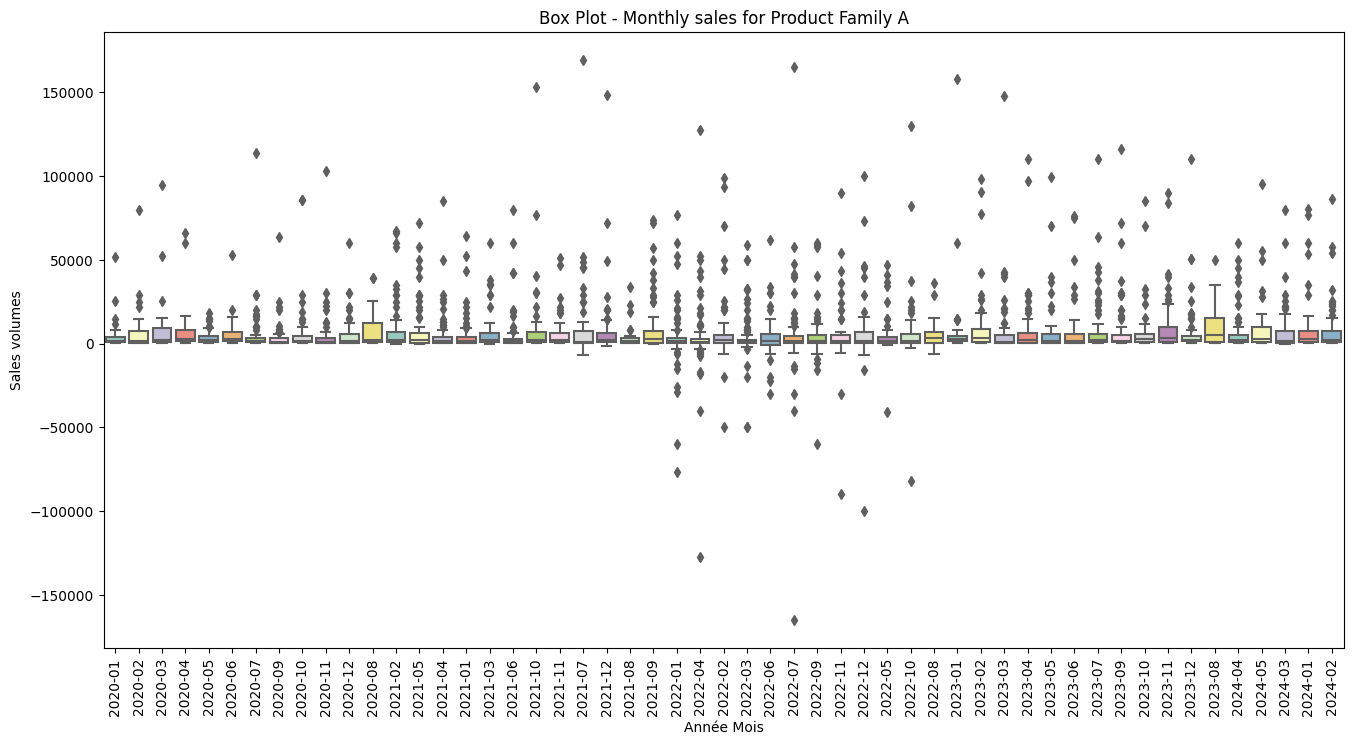

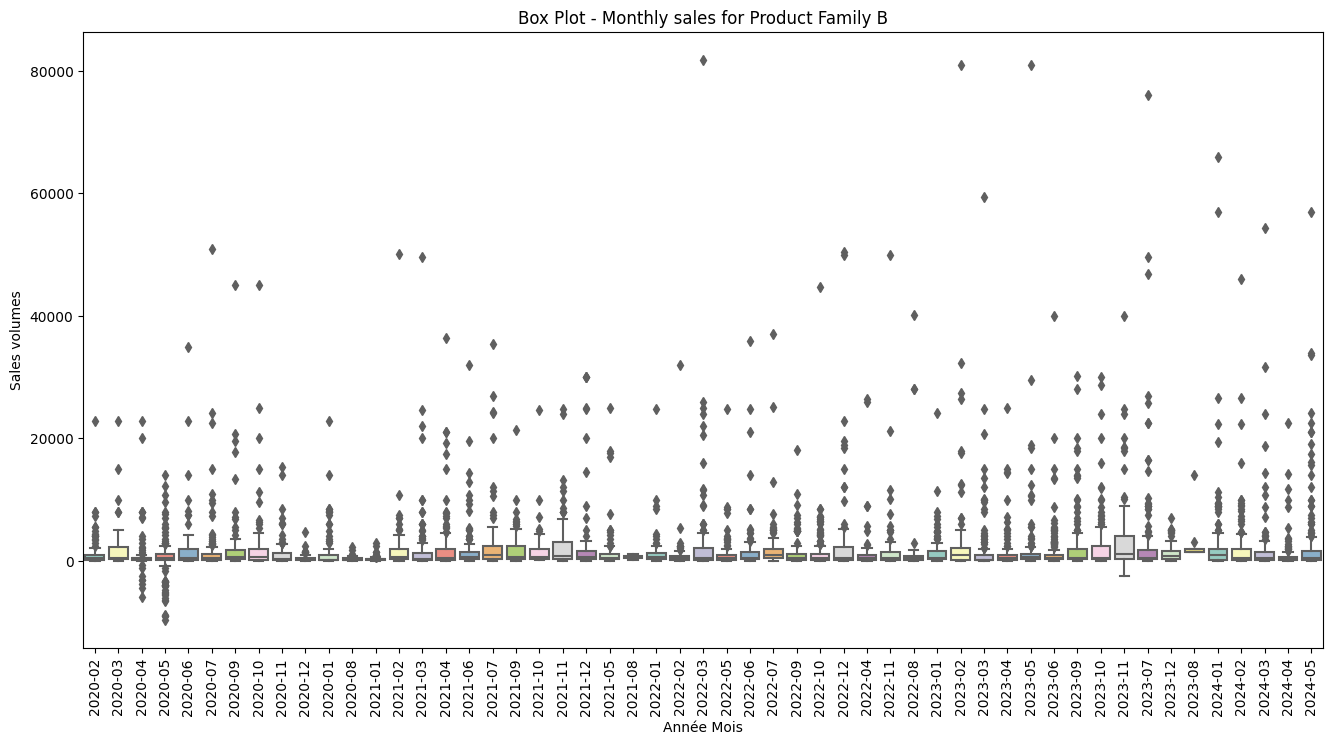

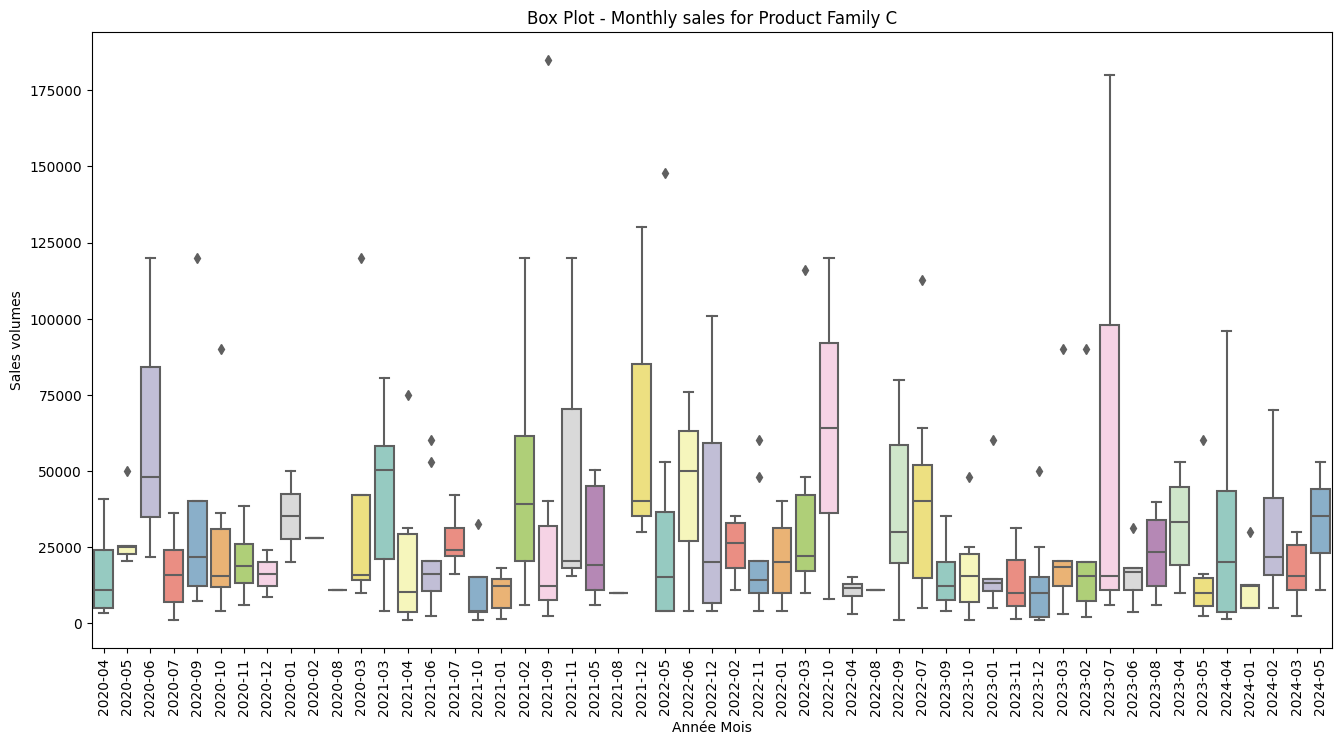

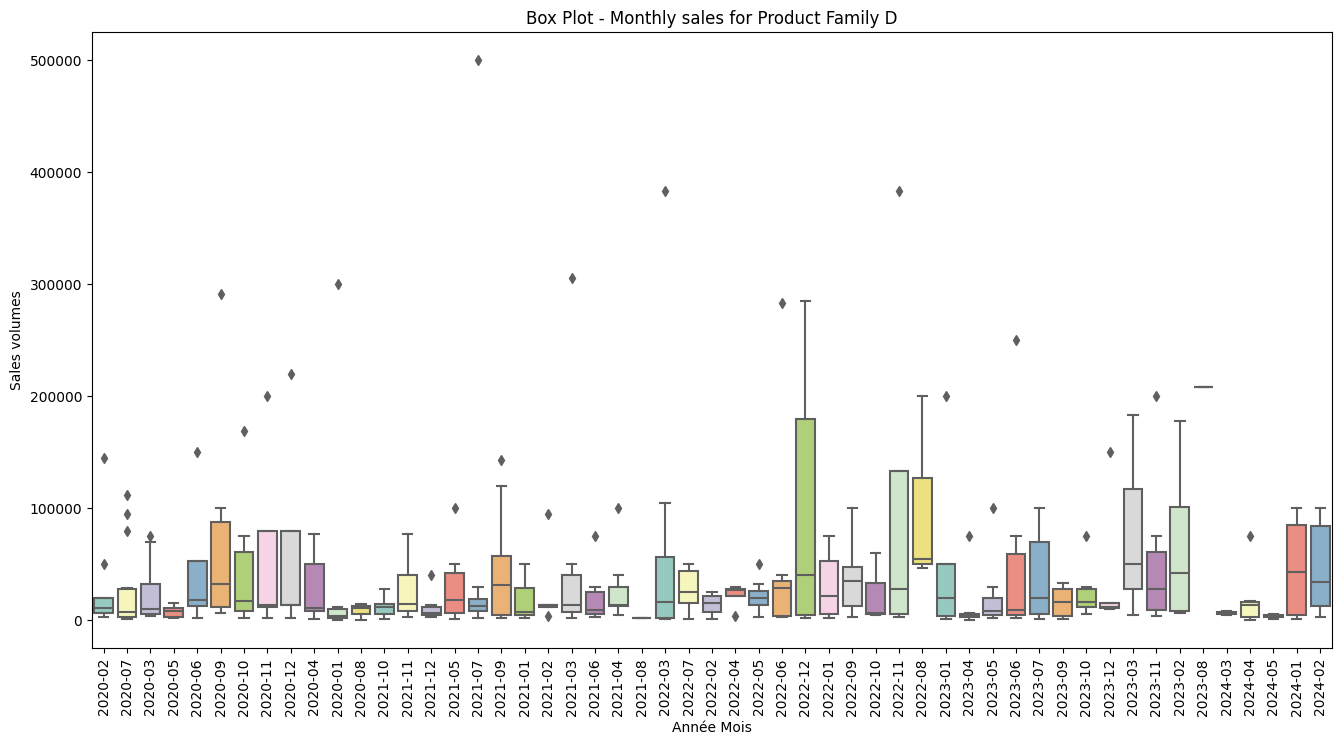

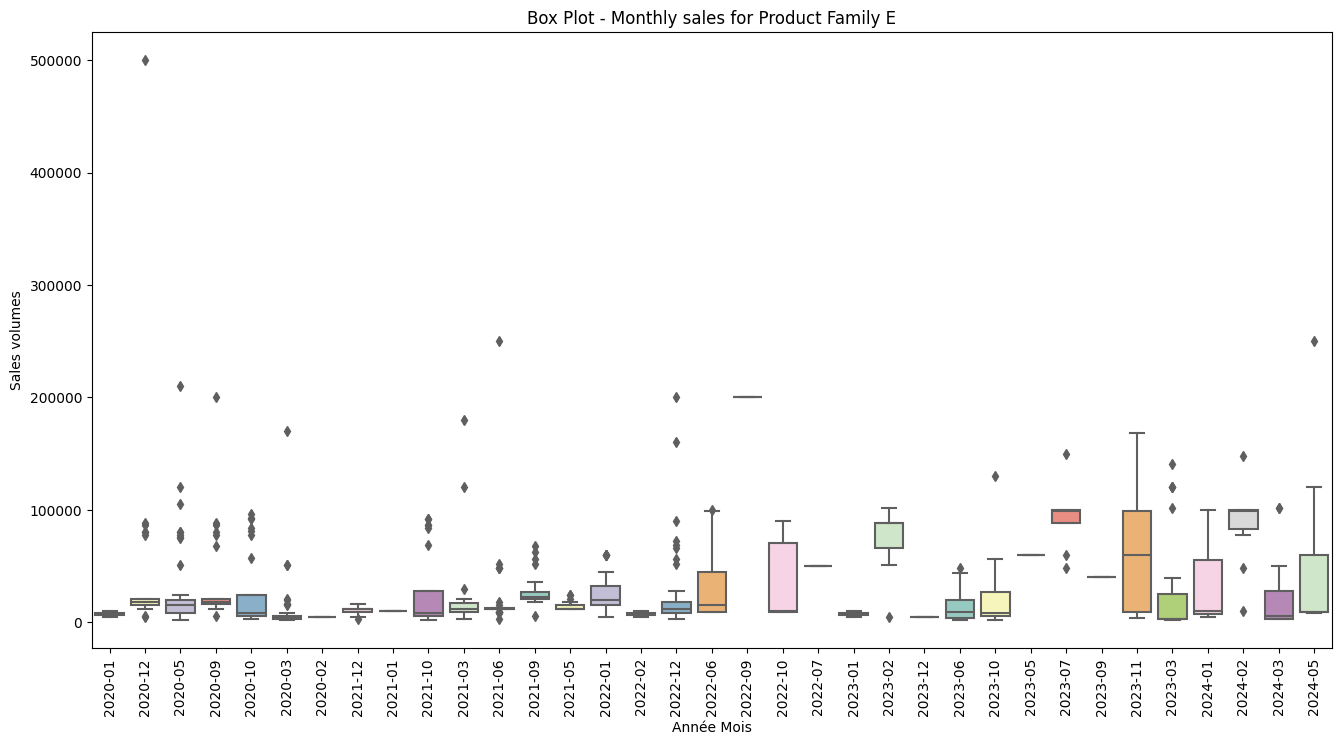

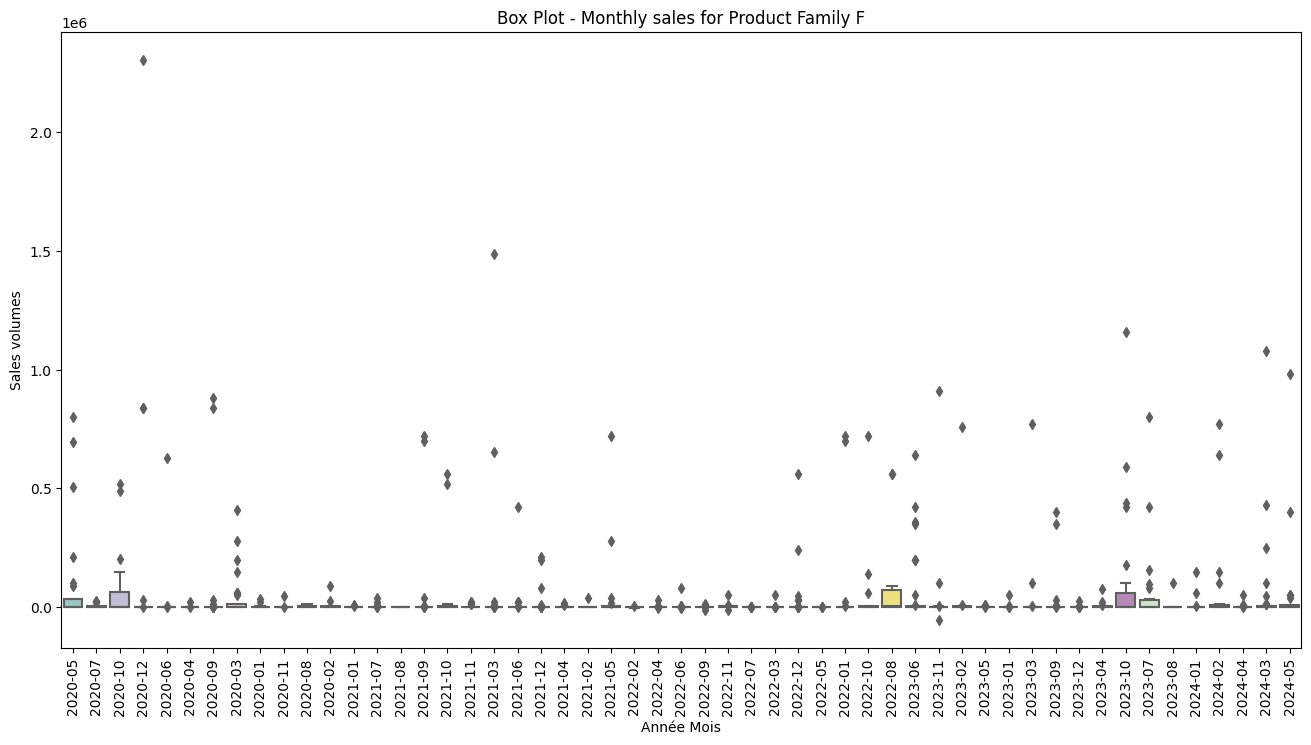

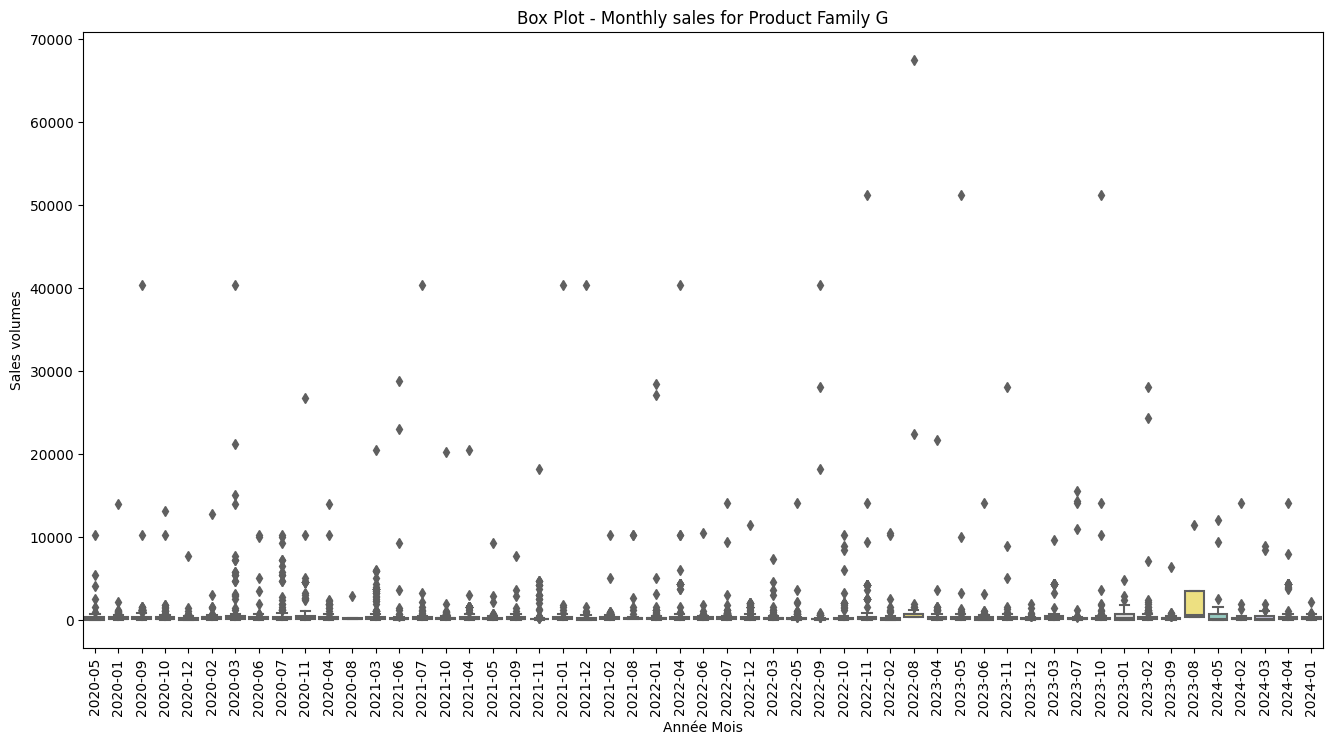

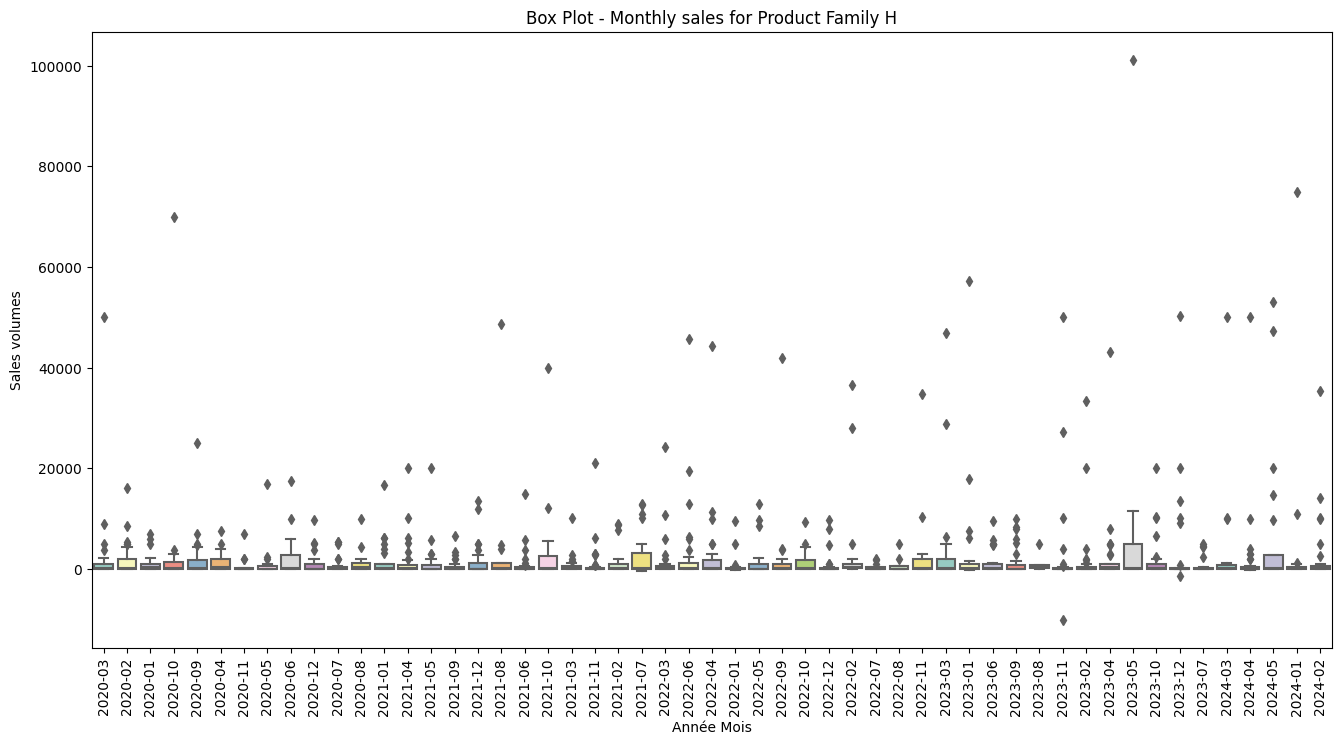

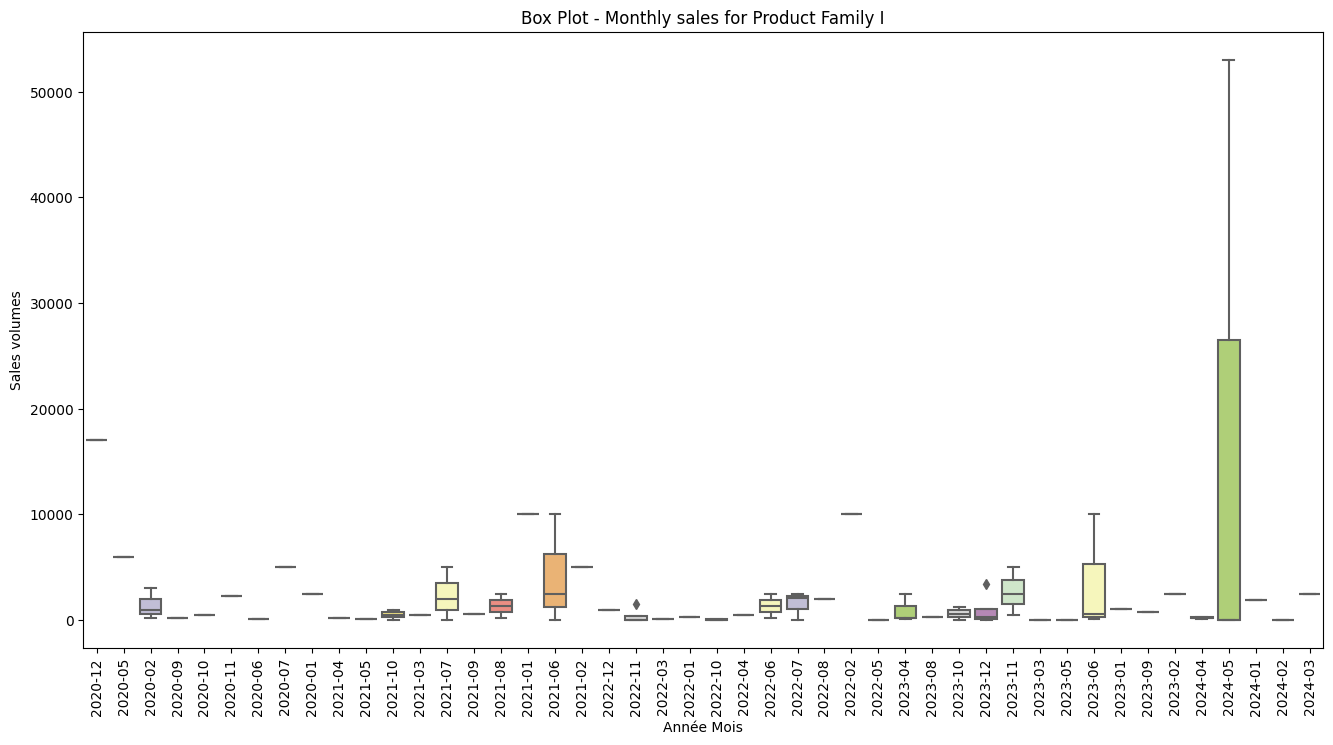

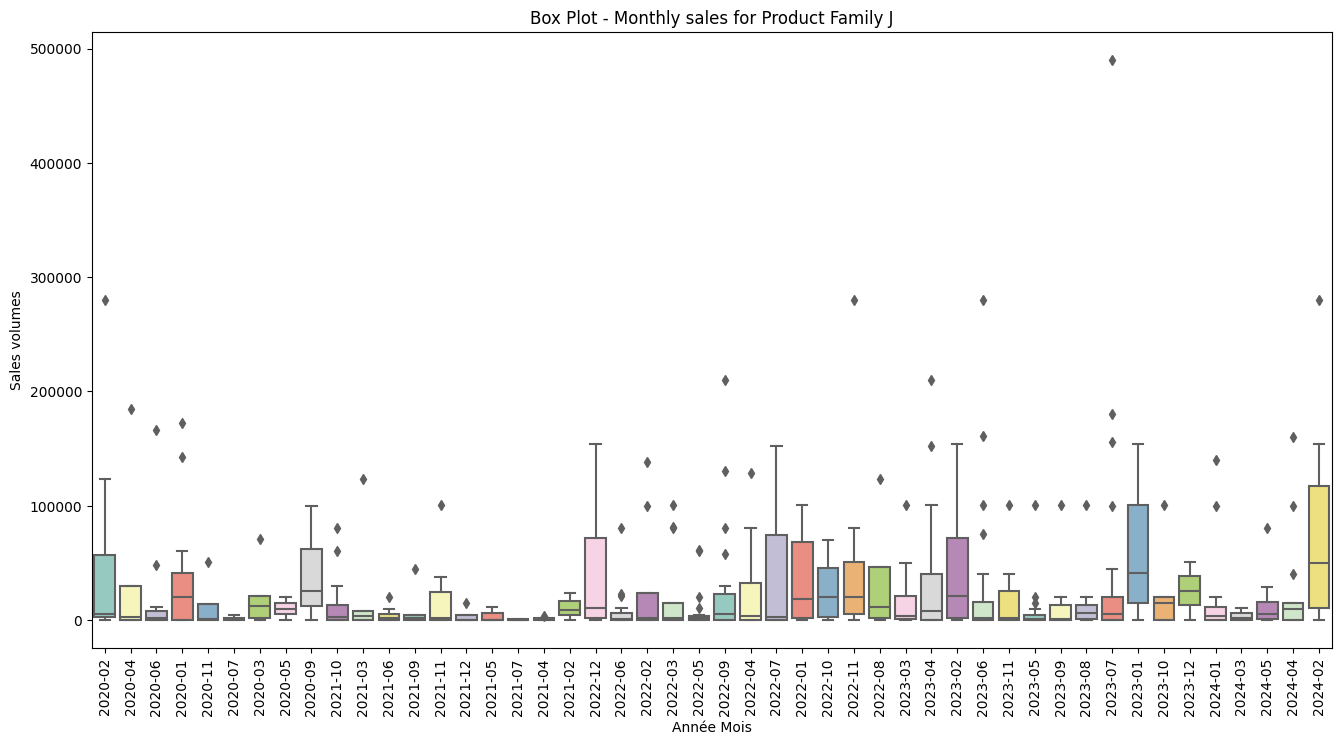

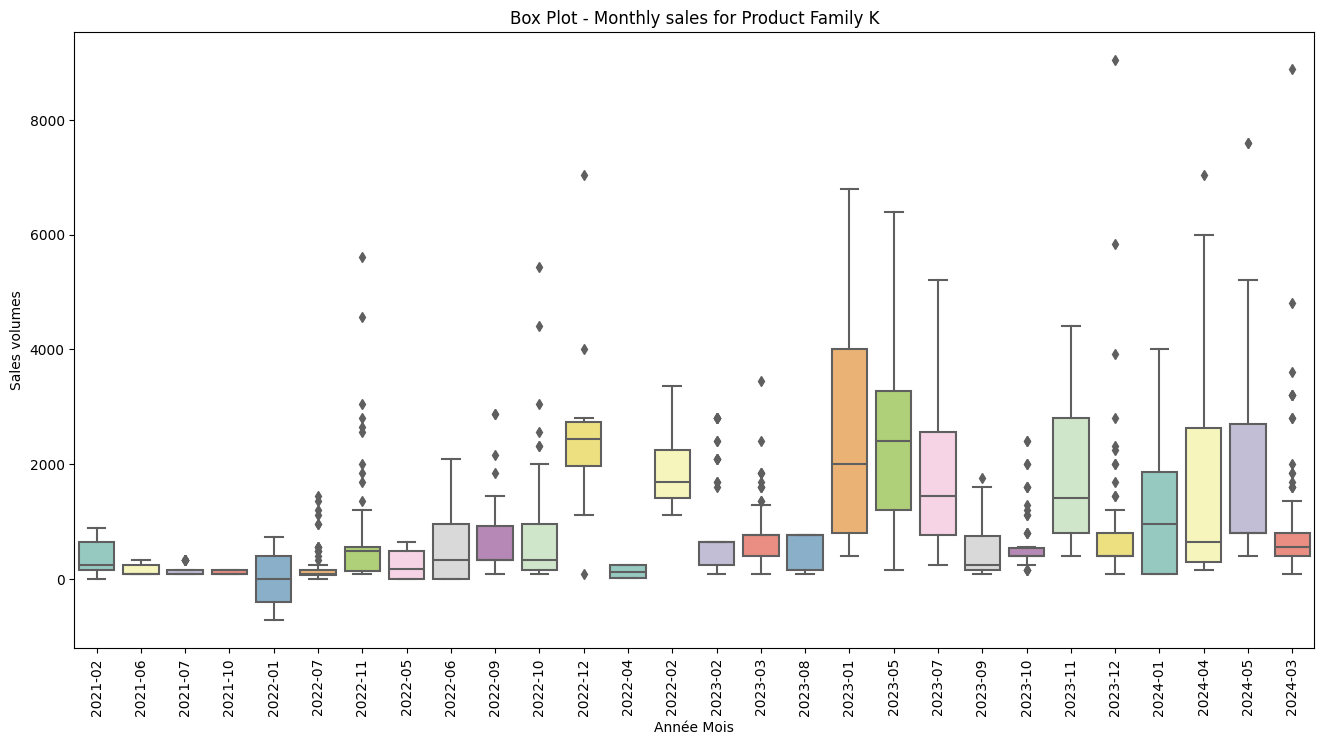

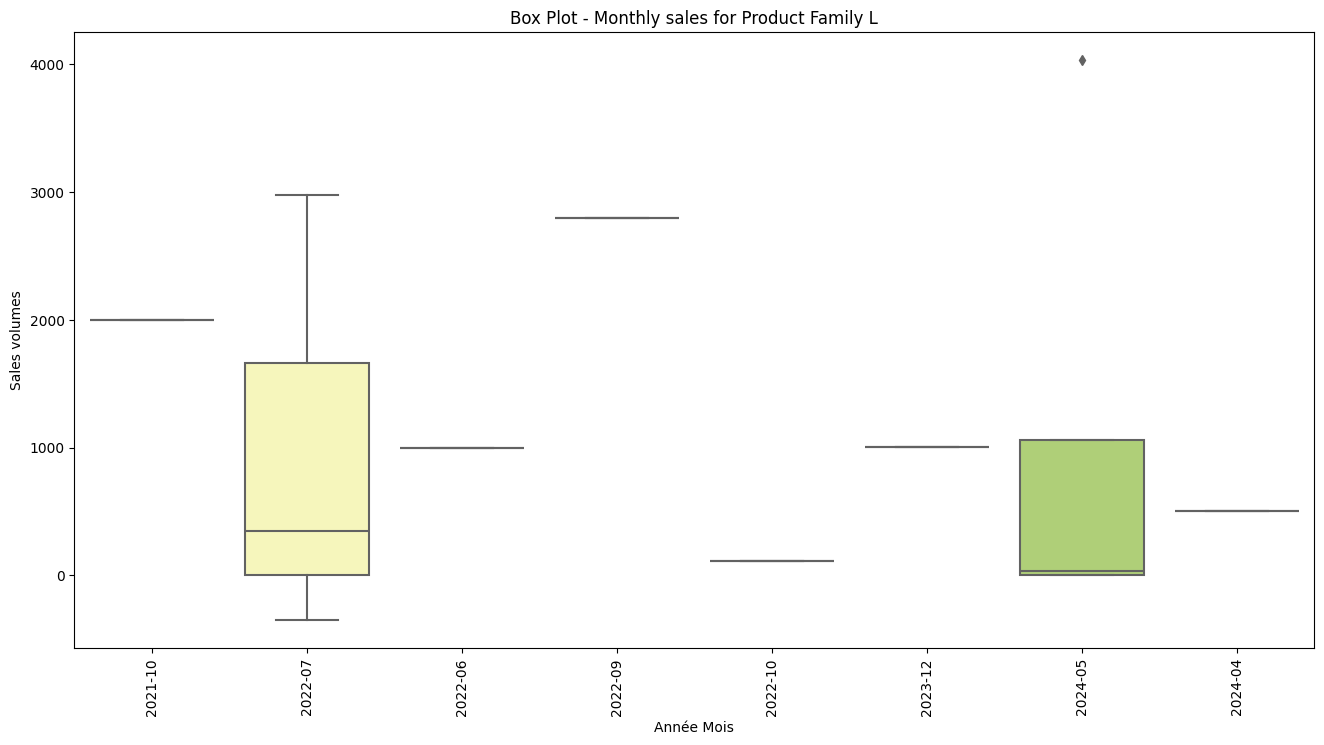

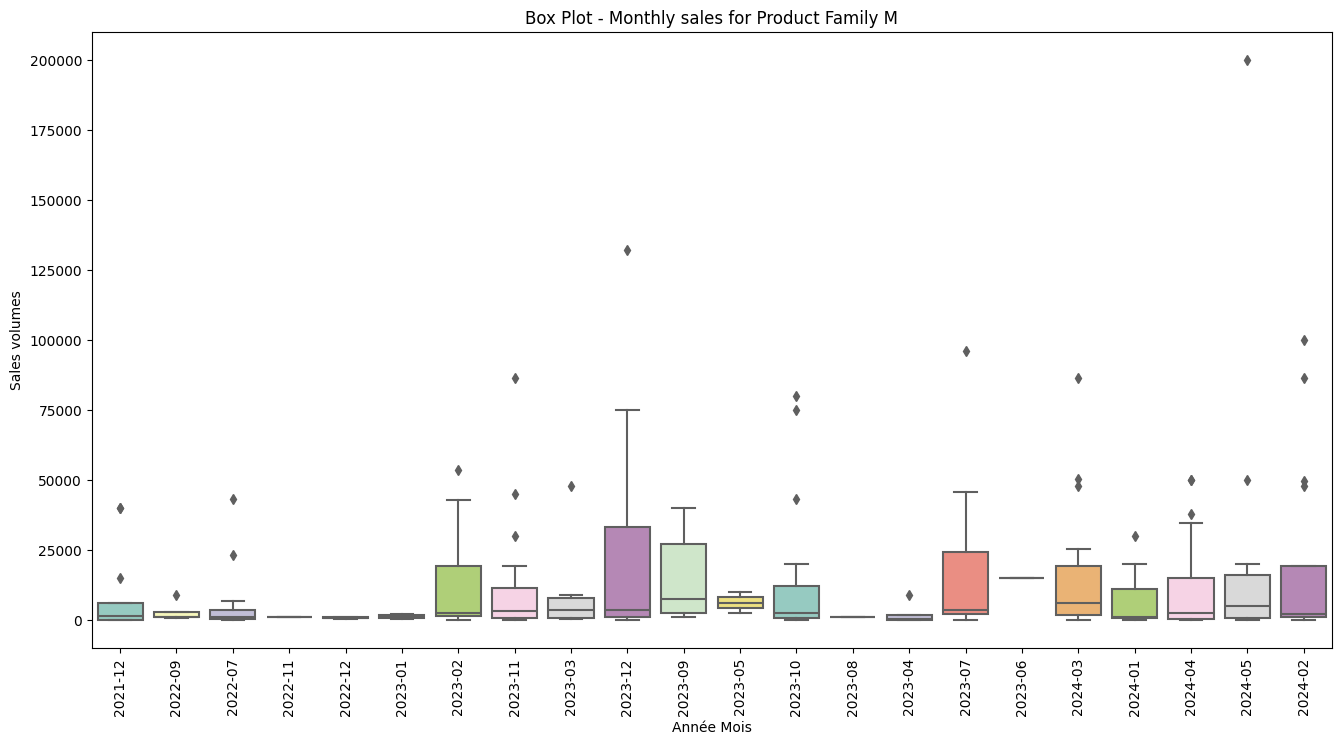

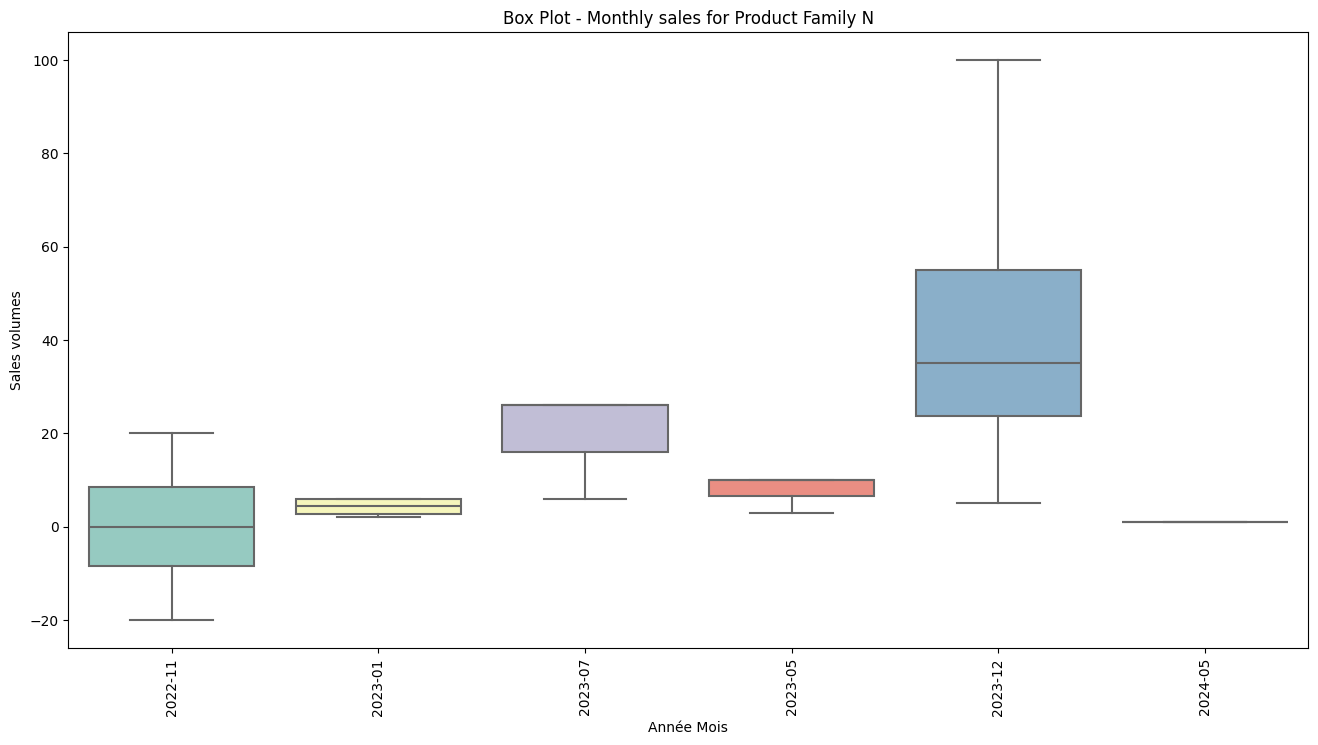

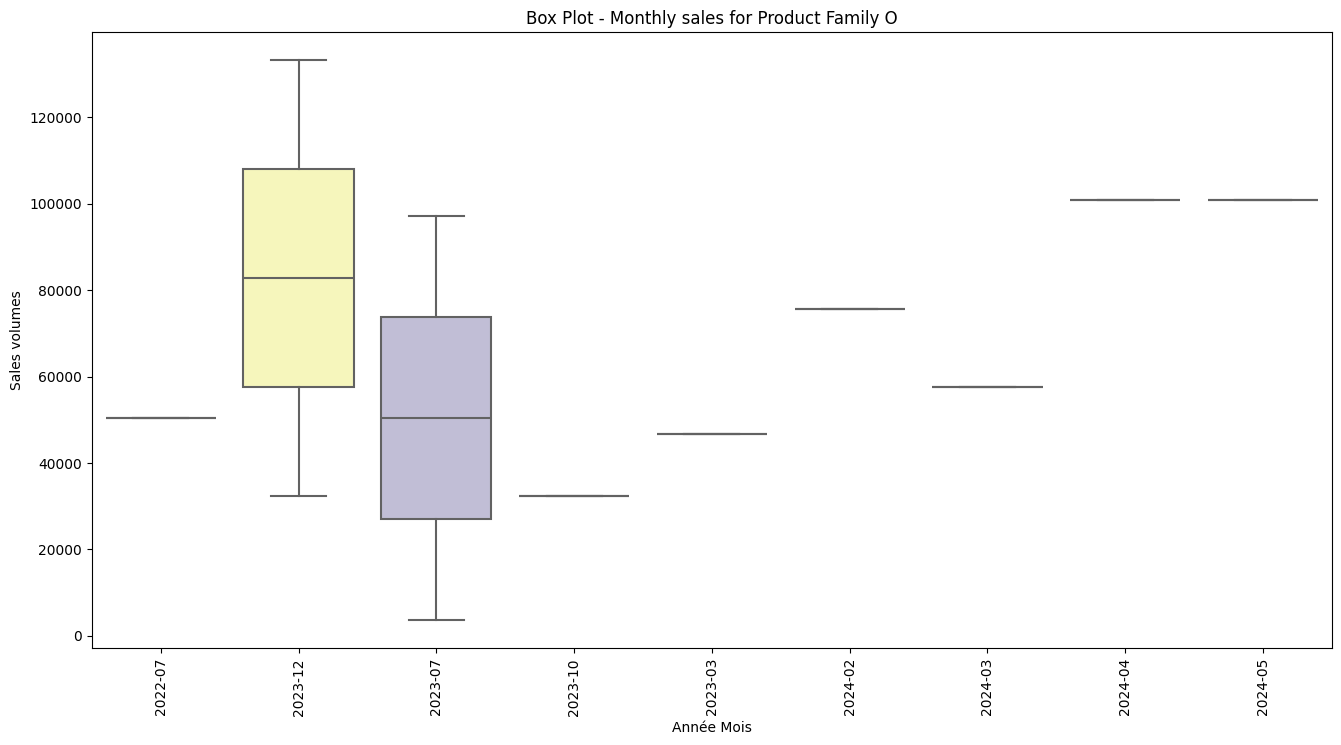

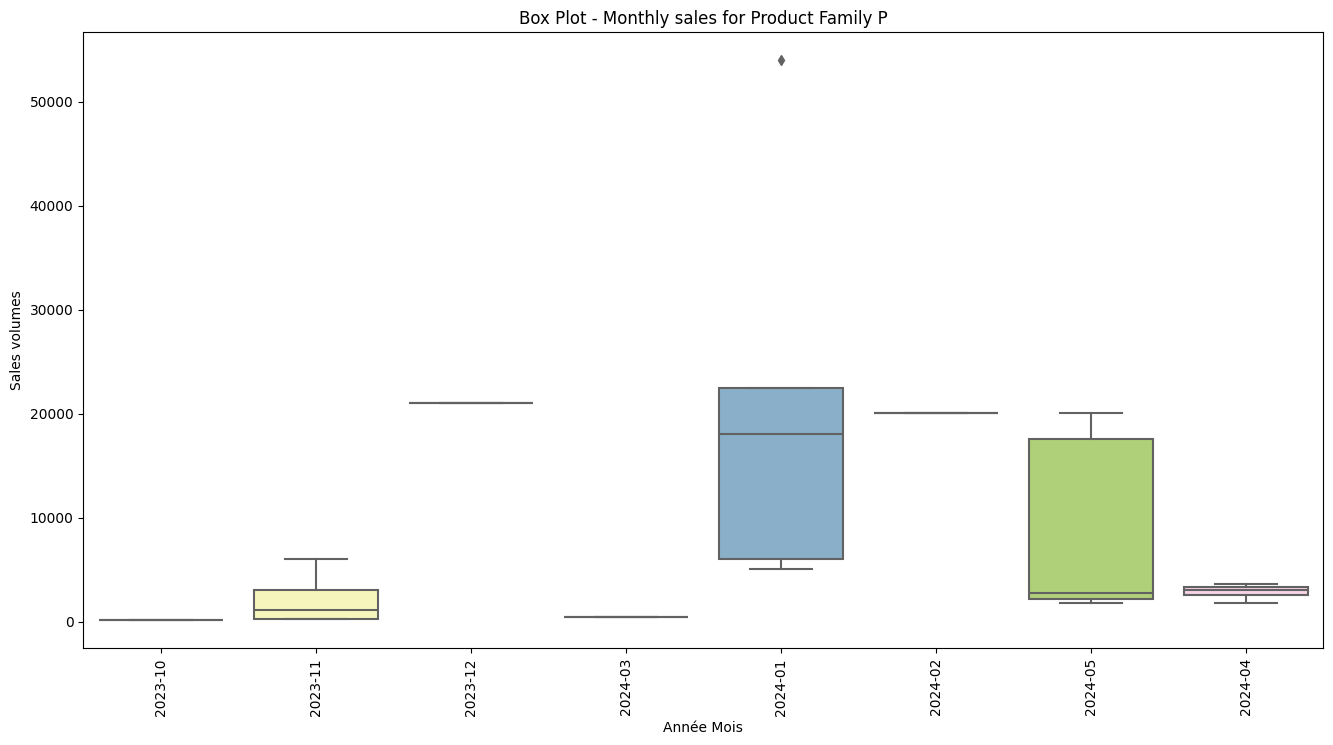

d:\WK\ydongue\AppData\Local\anaconda3\envs\devdaveyBickford\Lib\site-packages\seaborn\categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



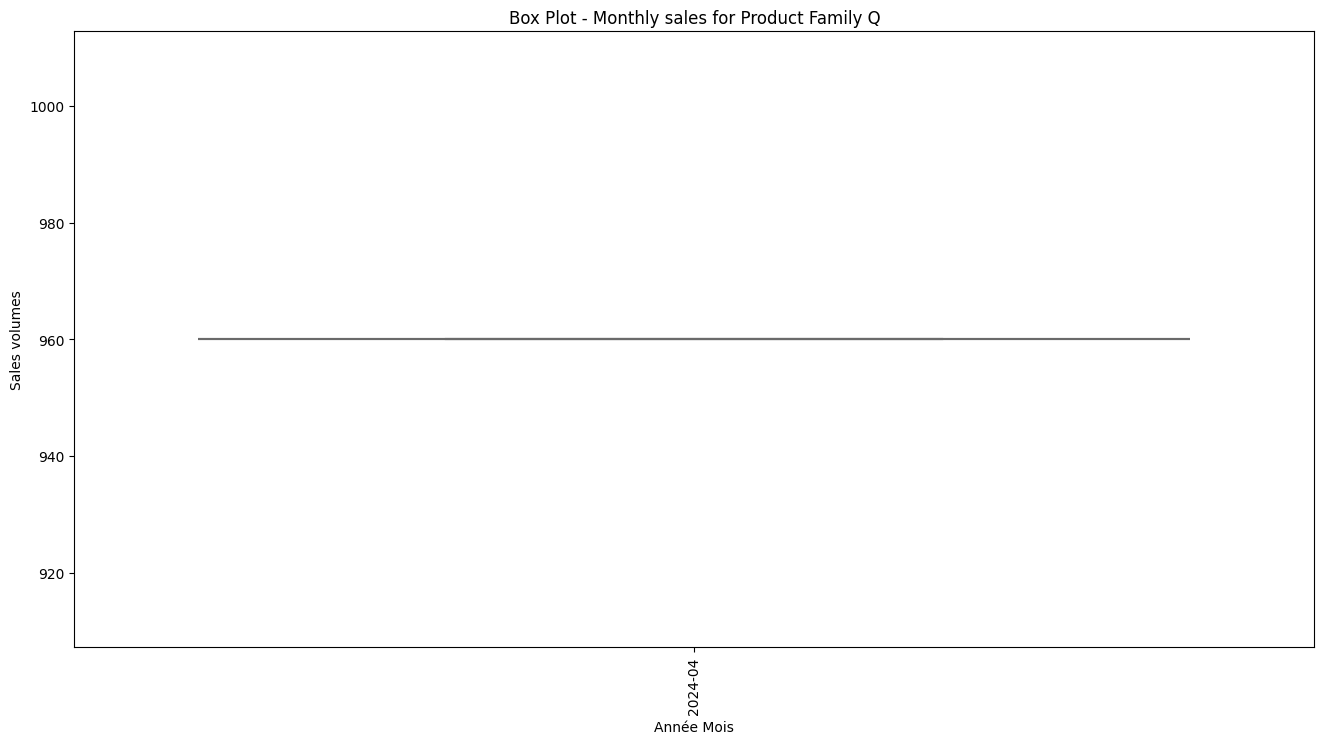

In [ ]:
# Extraire les colonnes year et month
df1['year'] = df1.index.year
df1['month'] = df1.index.month

# Créer la colonne année mois
df1['année mois'] = df1.index.to_period('M')

# Tracer les box plots pour chaque famille de produits
for family in df1['Product Family'].unique():
    df_family = df1[df1['Product Family'] == family]
    
    plt.figure(figsize=(16, 8))
    sns.boxplot(x='année mois', y='SIGNEDDATA', data=df_family.reset_index(), palette='Set3')
    plt.xticks(rotation=90)
    plt.title(f"Box Plot - Monthly sales for Product Family {family}")
    plt.xlabel('Année Mois')
    plt.ylabel('Sales volumes')
    plt.show()

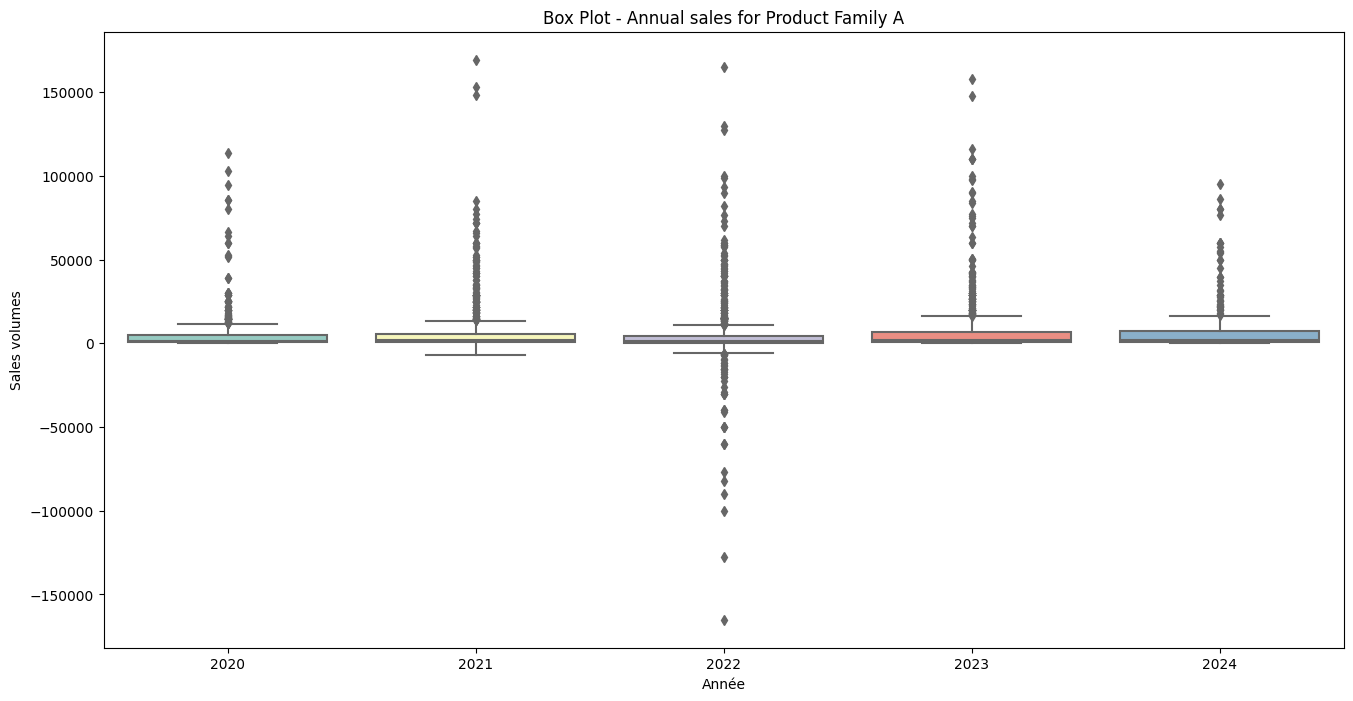

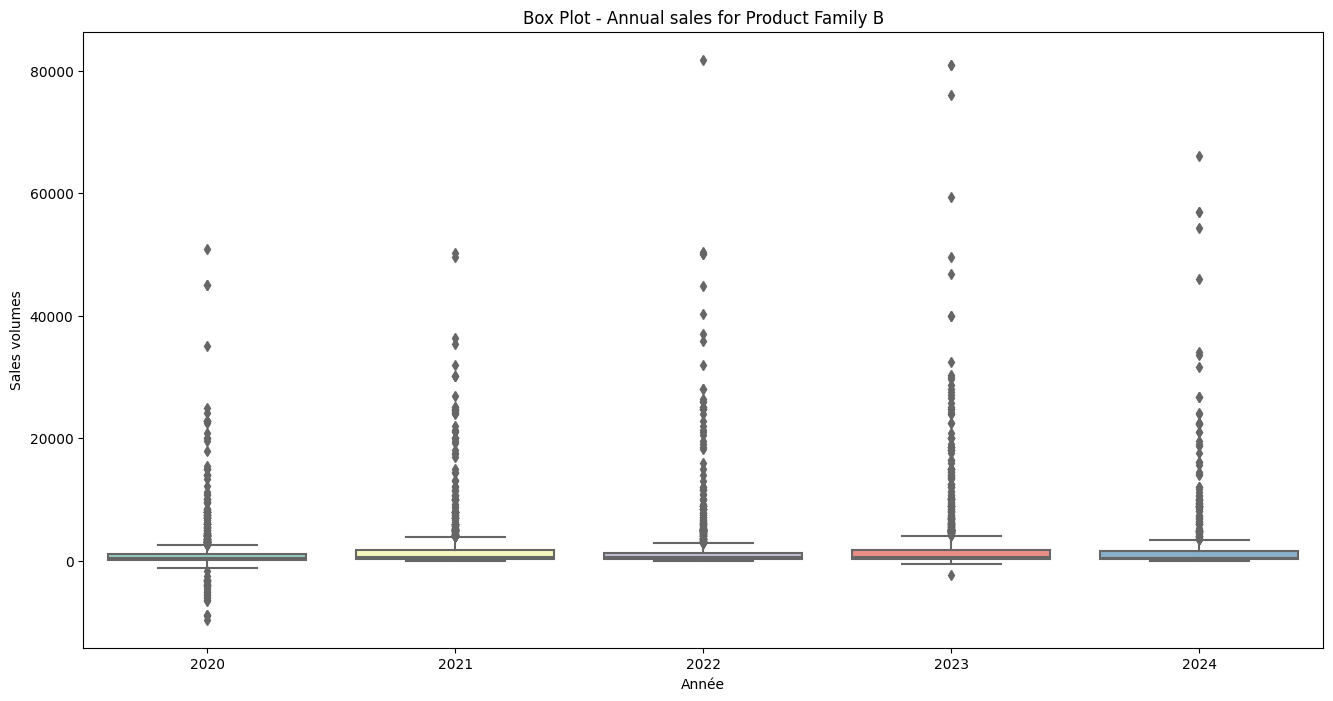

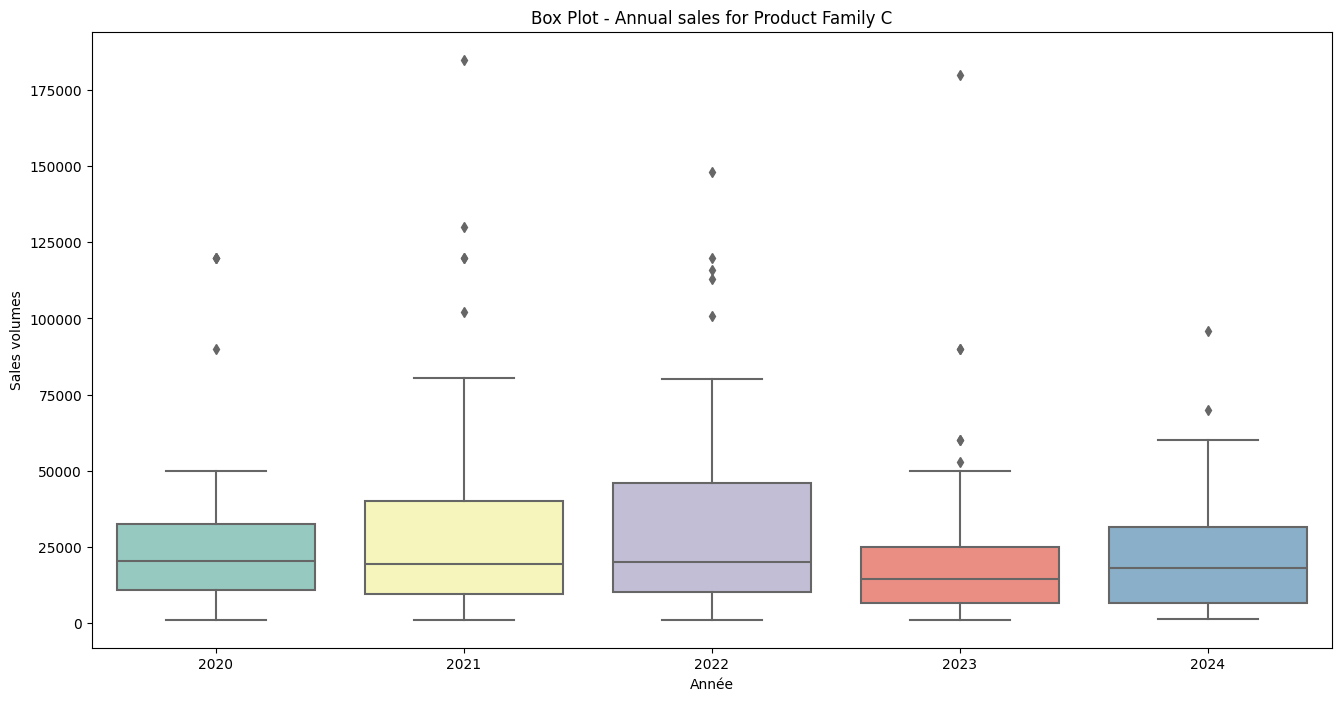

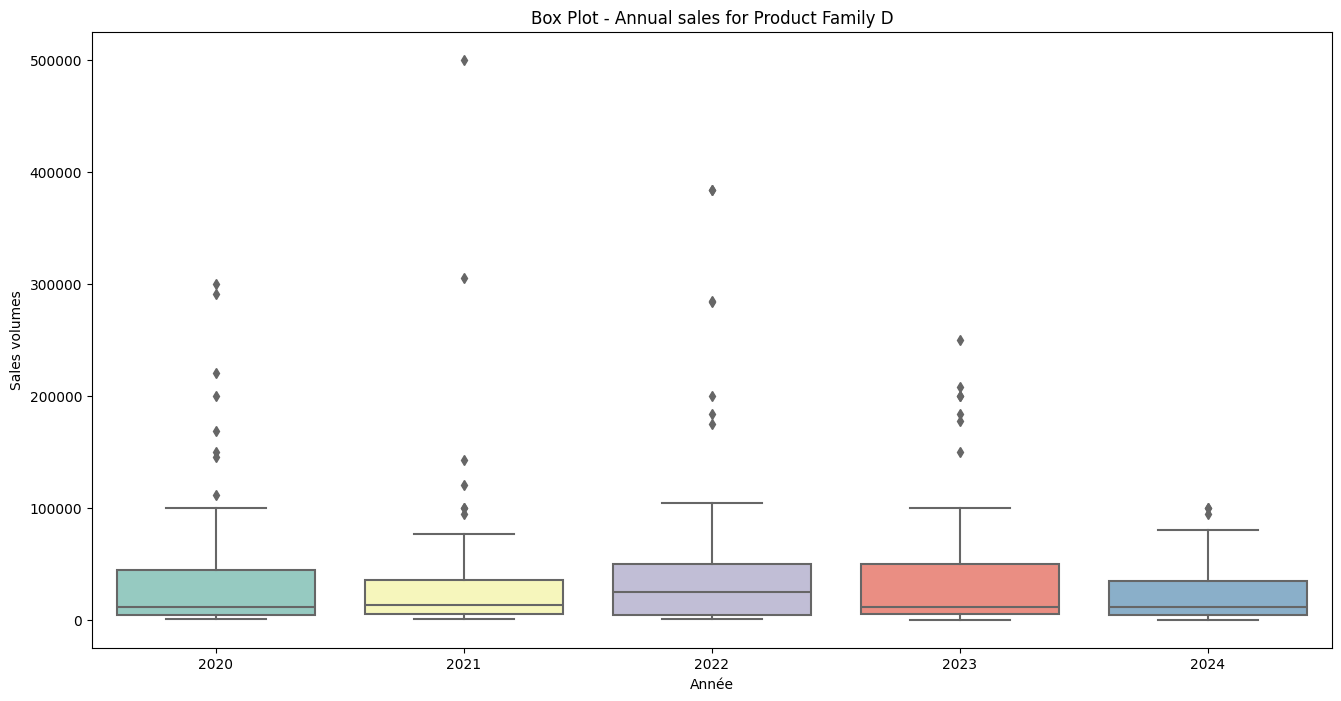

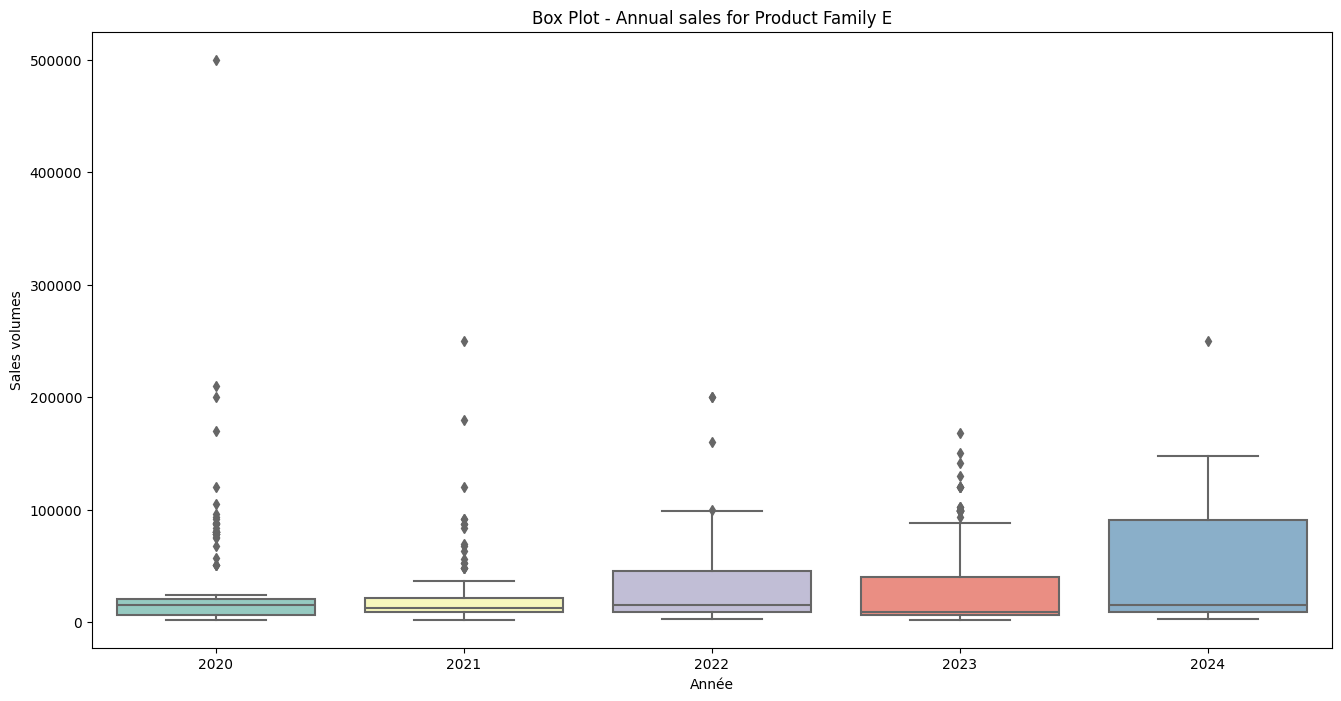

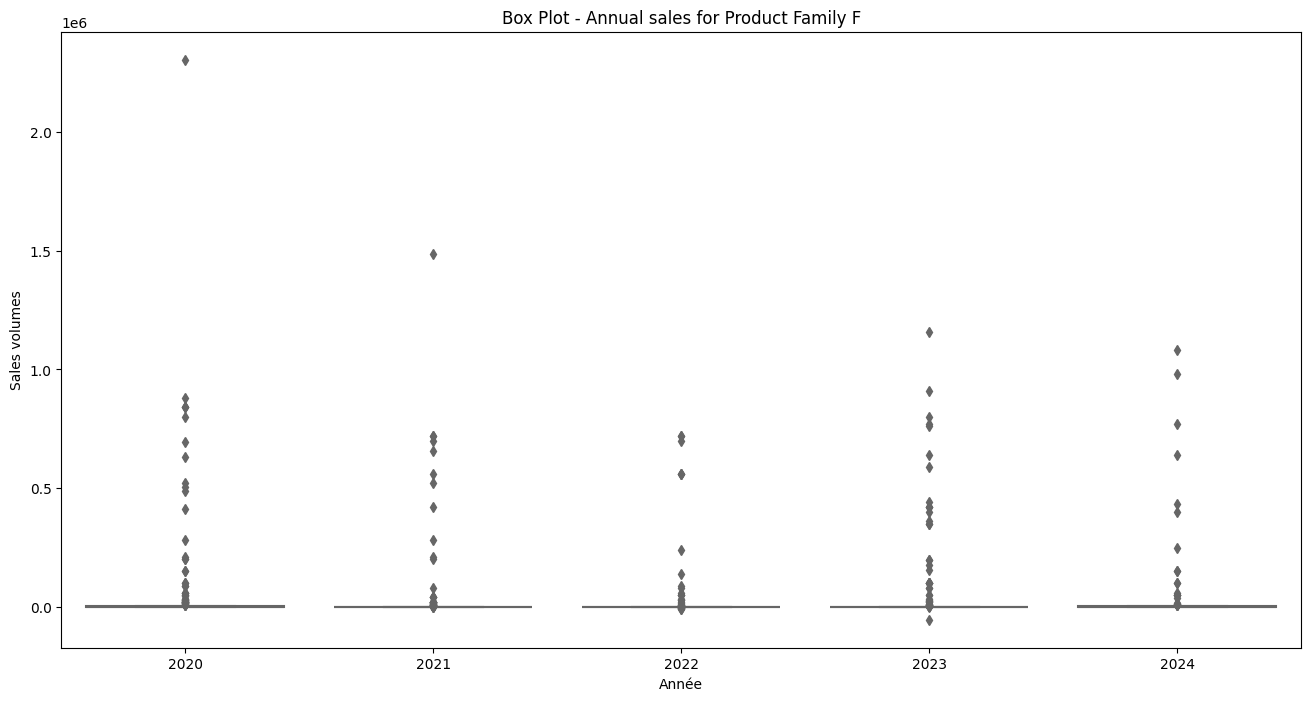

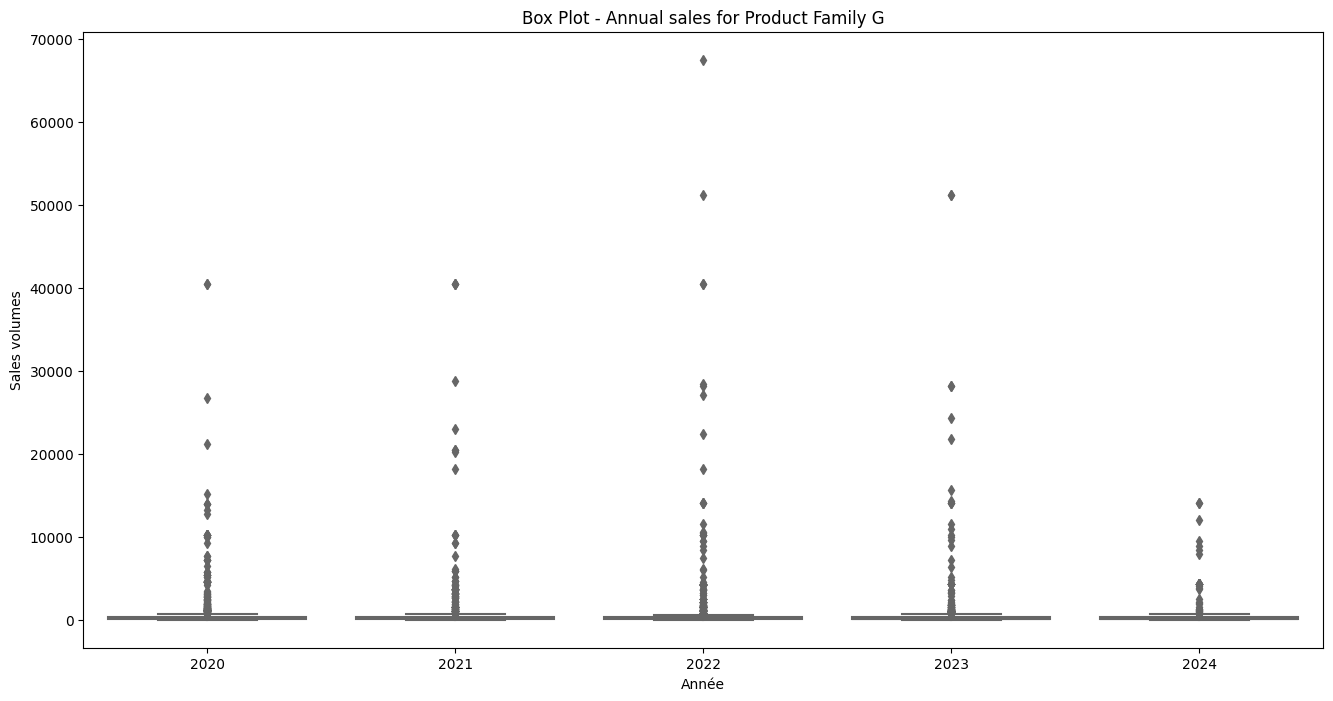

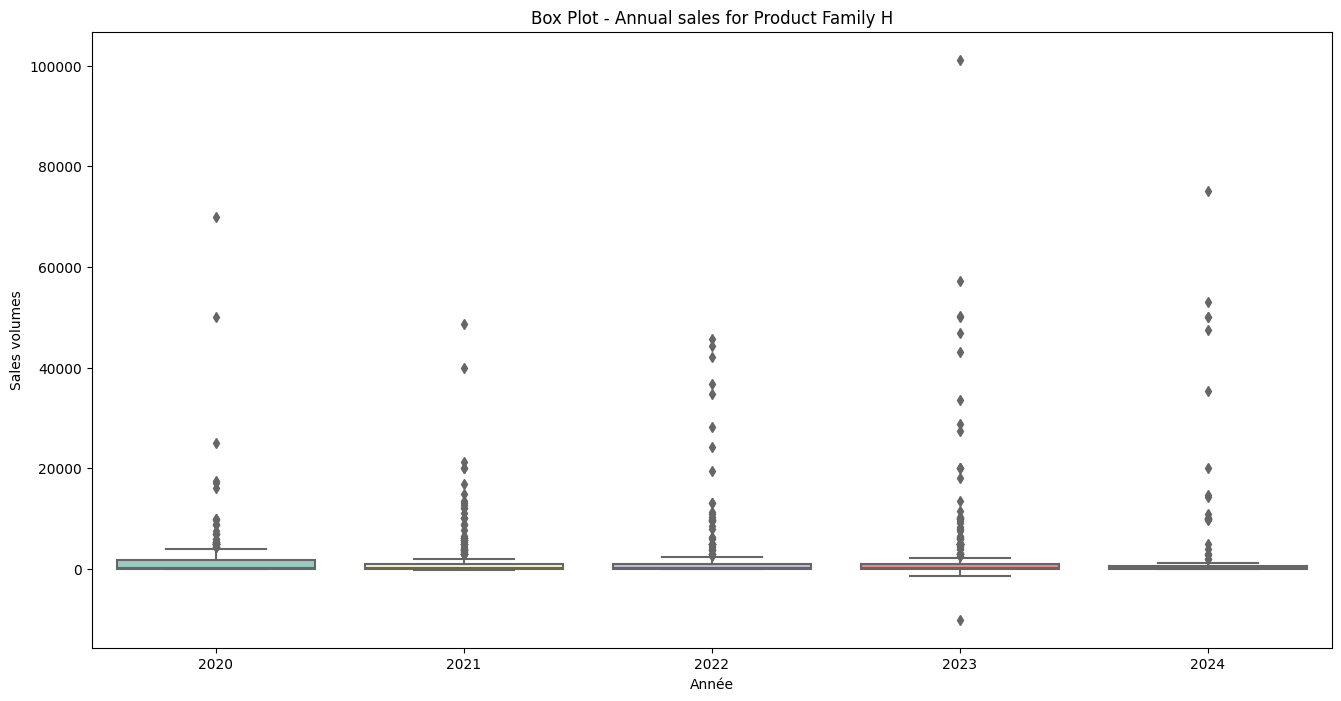

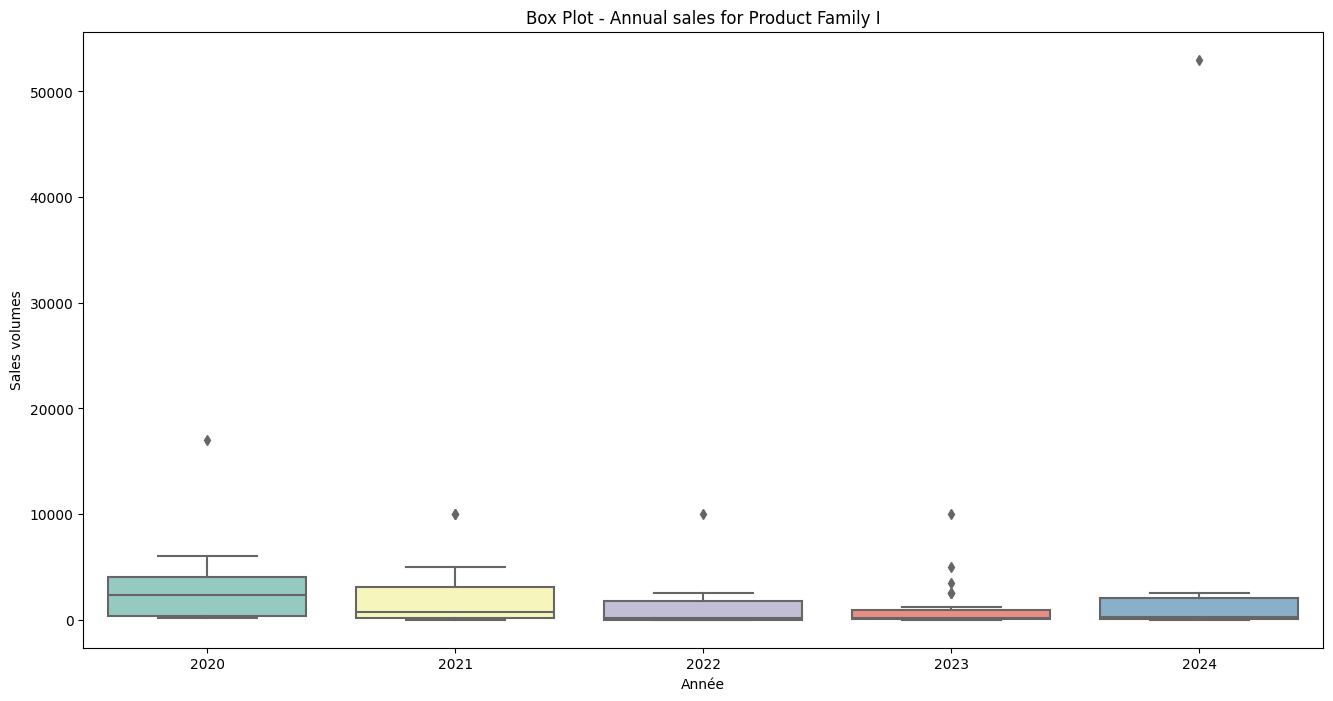

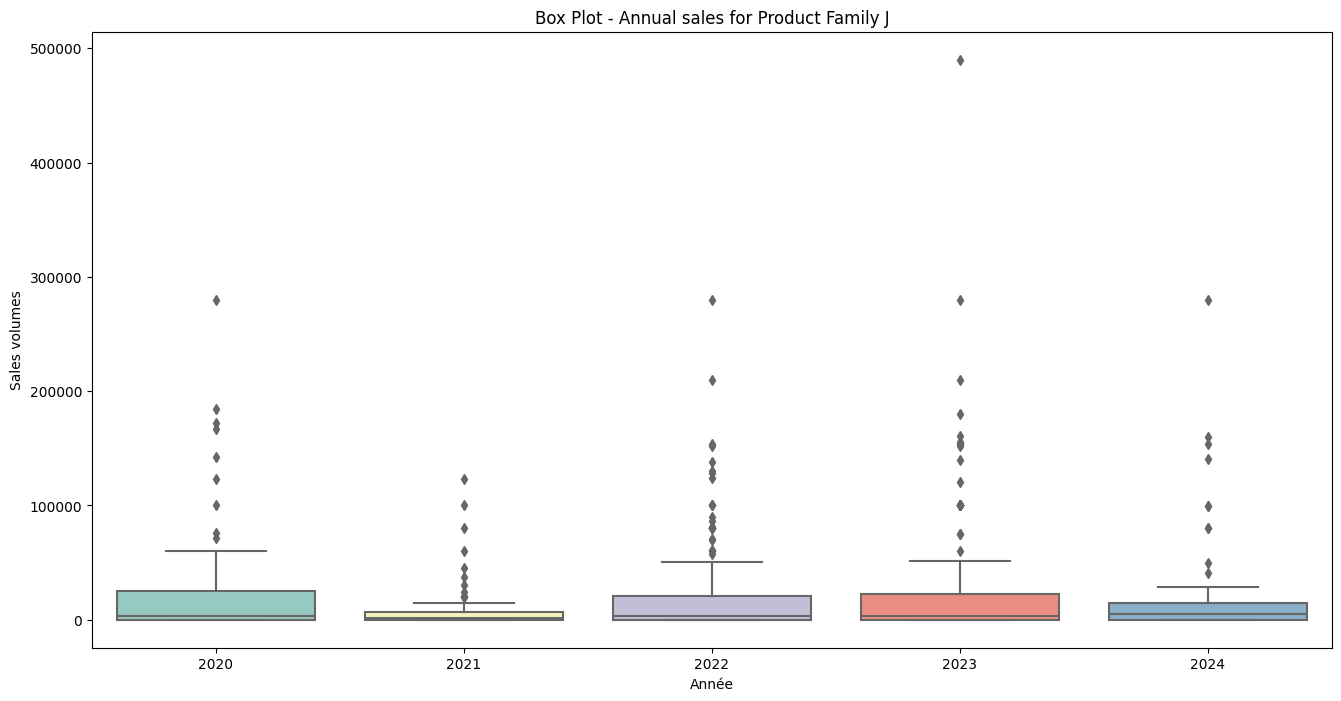

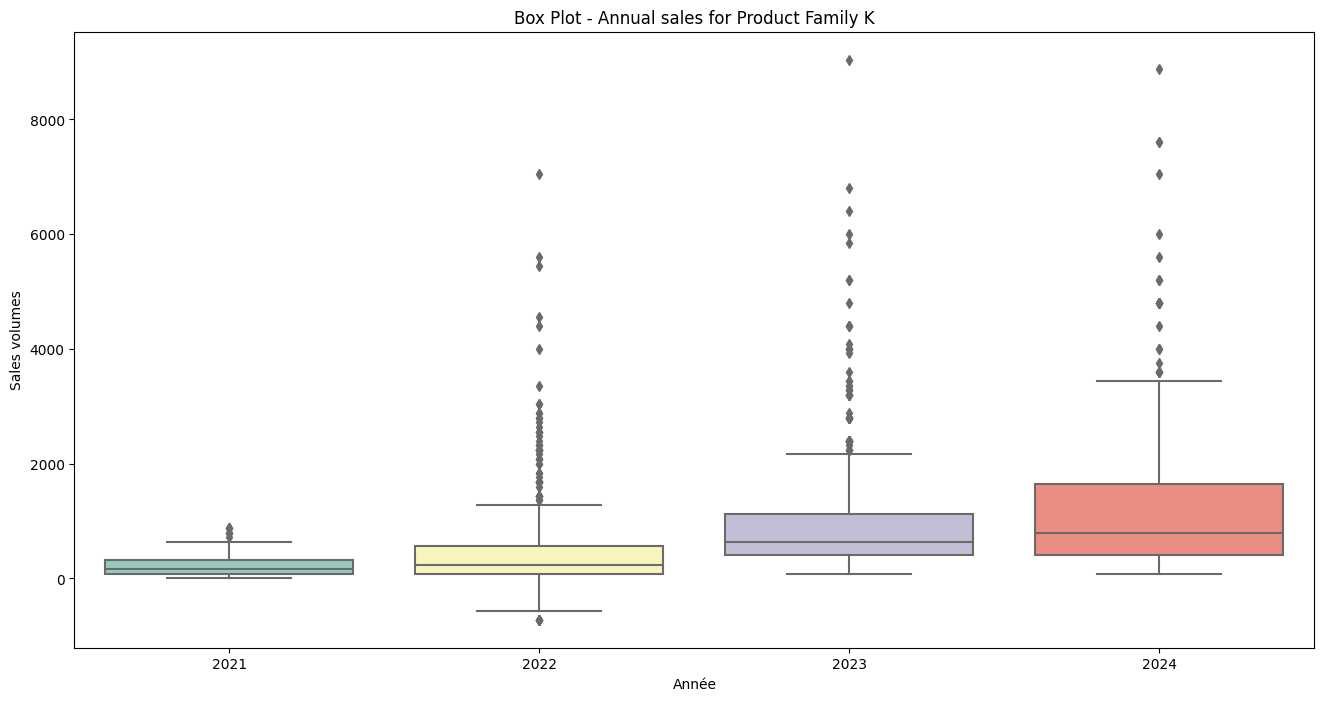

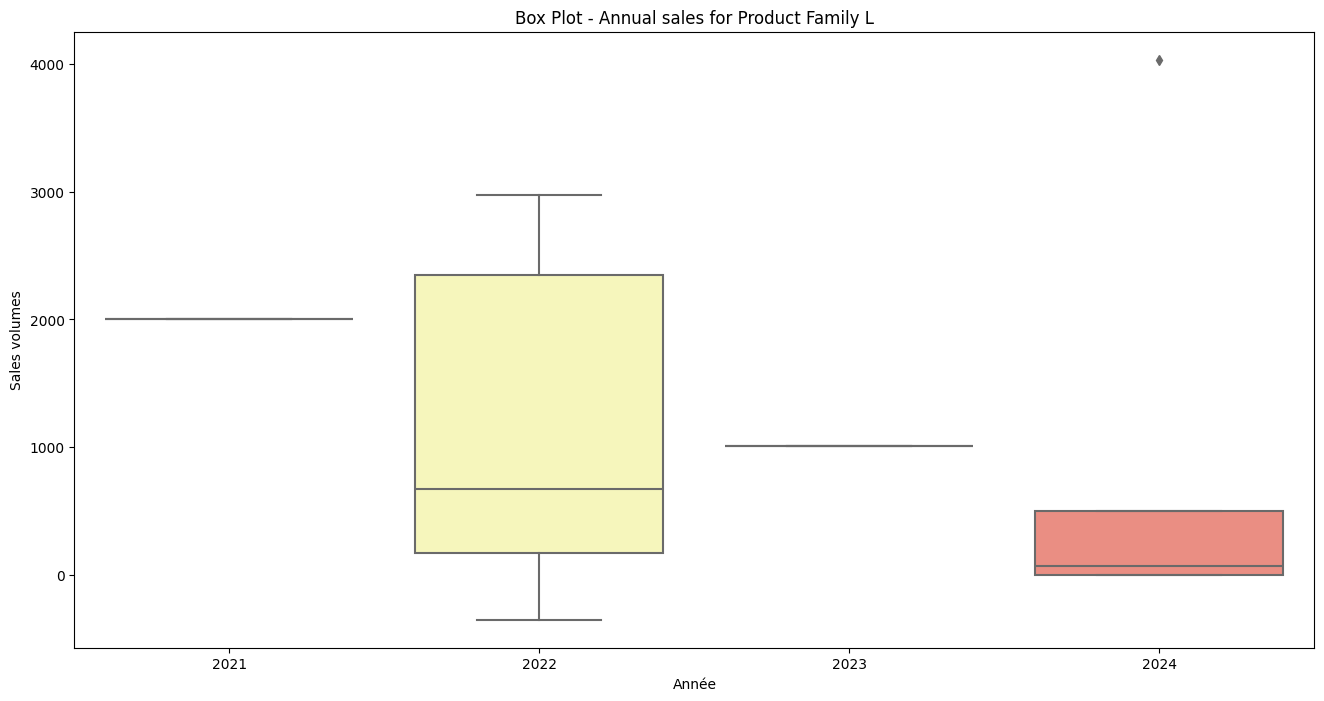

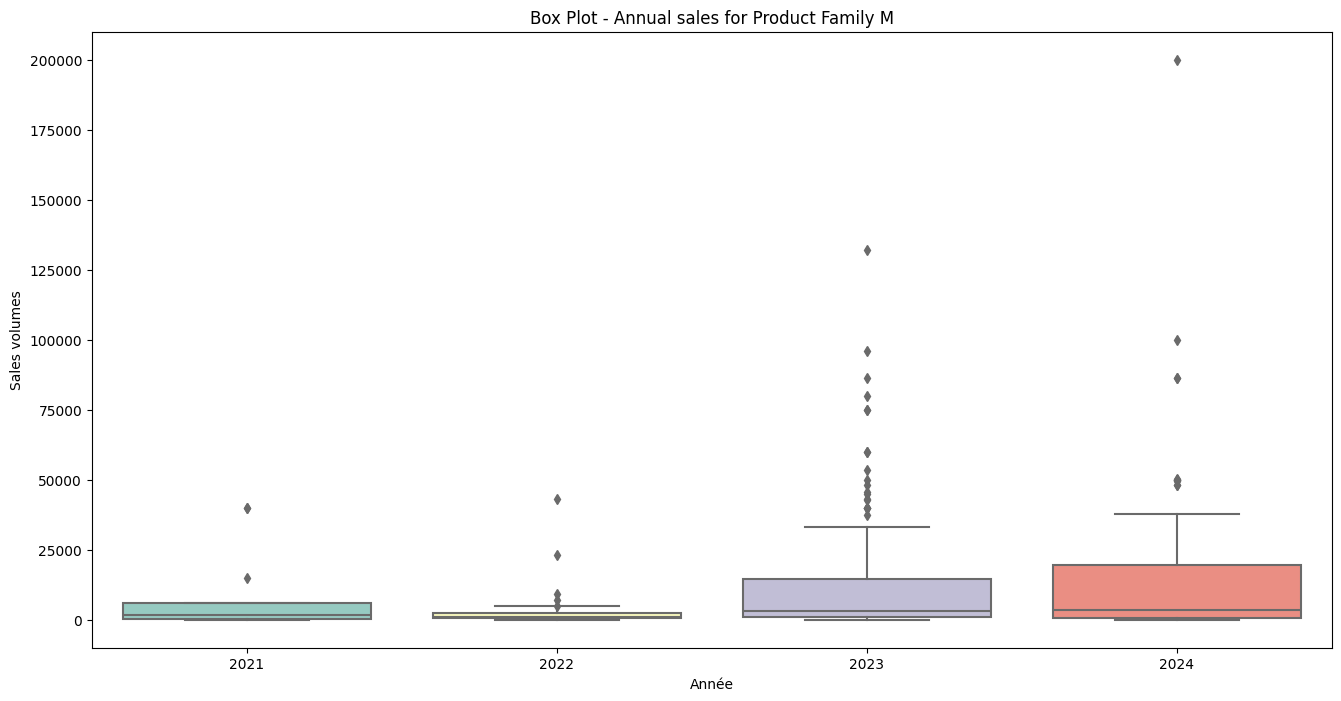

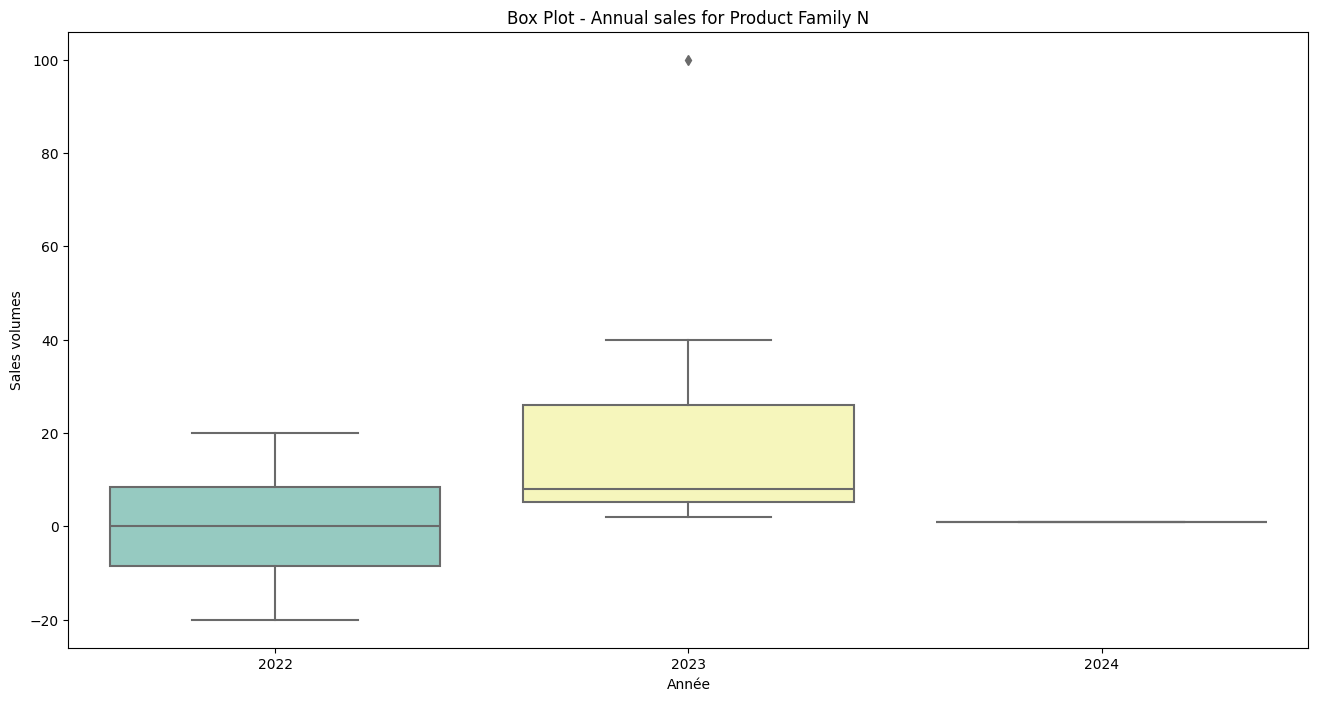

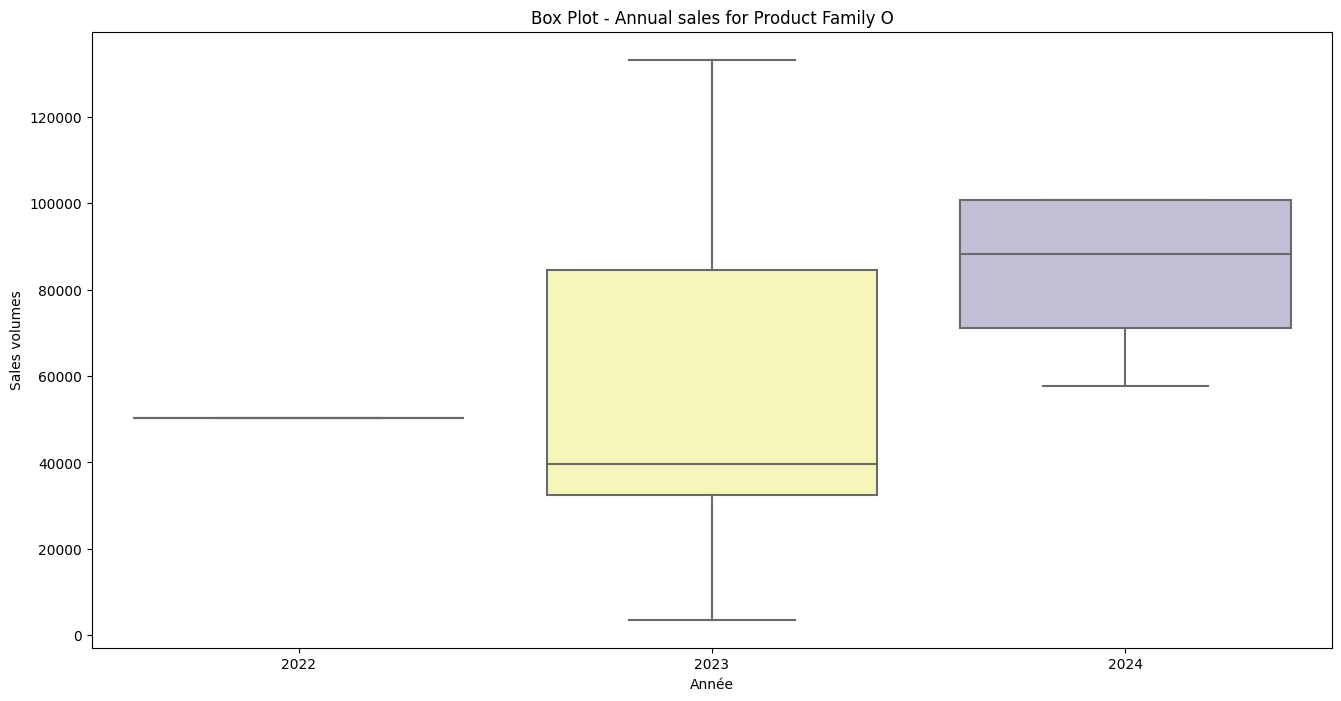

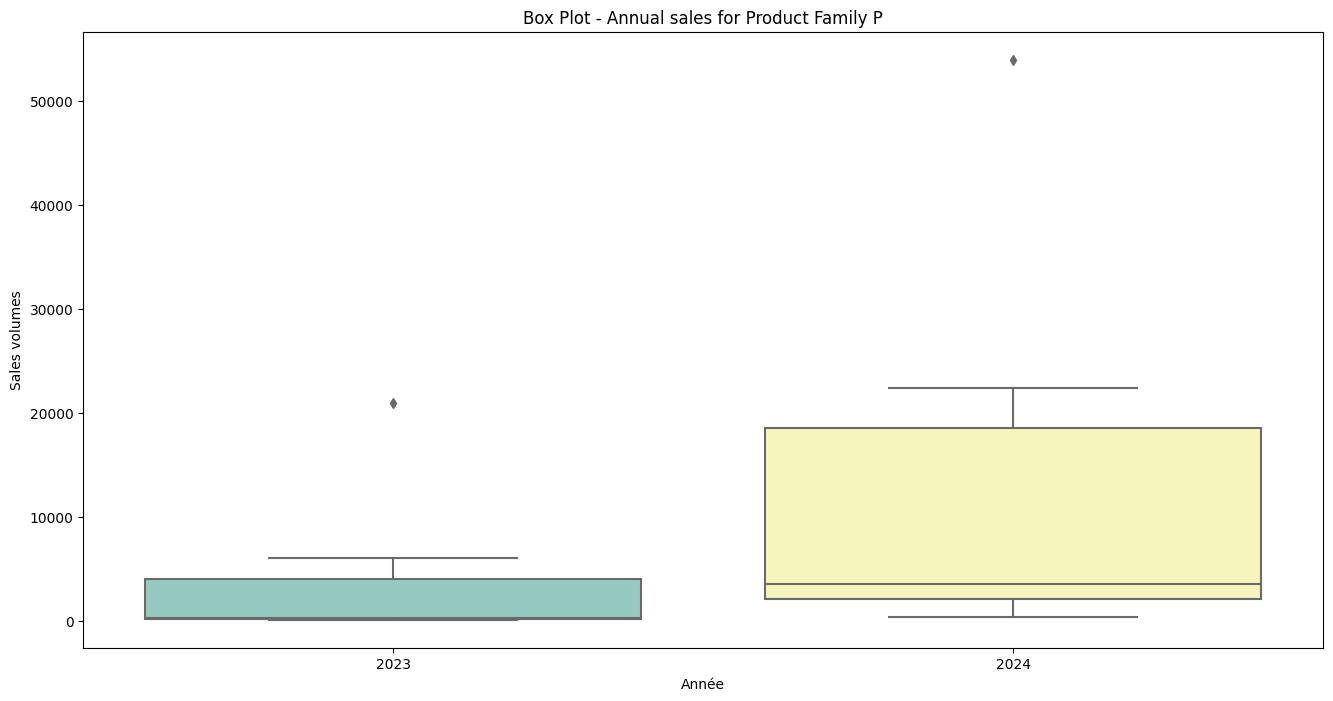

d:\WK\ydongue\AppData\Local\anaconda3\envs\devdaveyBickford\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


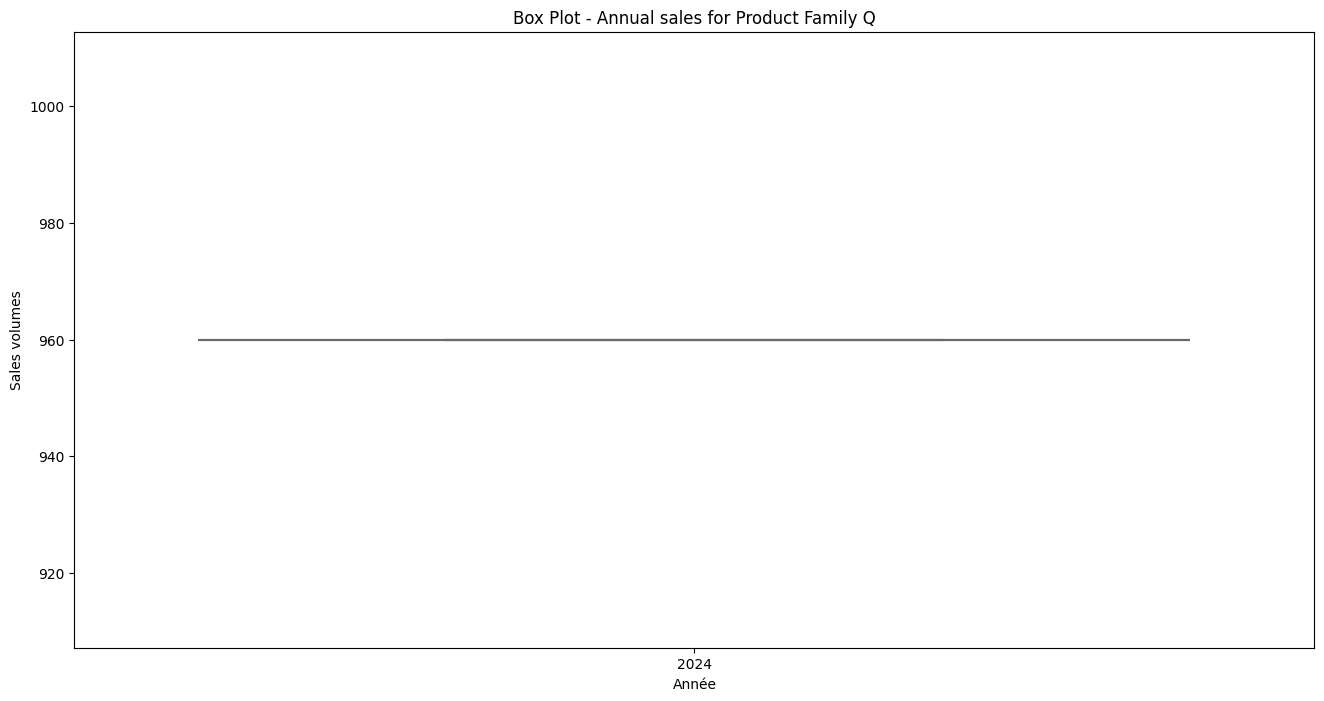

In [ ]:
df1['year'] = df1.index.year

# Tracer les box plots pour chaque famille de produits
for family in df1['Product Family'].unique():
    df_family = df1[df1['Product Family'] == family]
    
    plt.figure(figsize=(16, 8))
    sns.boxplot(x='year', y='SIGNEDDATA', data=df_family.reset_index(), palette='Set3')
    plt.title(f"Box Plot - Annual sales for Product Family {family}")
    plt.xlabel('Année')
    plt.ylabel('Sales volumes')
    plt.show()

In [ ]:
#seed = 42
#random.seed(seed)
dfTime = read_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\Processed\Product families over time.csv")
dforig = dfTime.set_index('Product Family').T

df2 = dfTime.set_index('Product Family').T
df2.index = to_datetime(df2.index)
df2.head(2)

## Descriptive stats : describe

In [ ]:
for family in dforig.columns:
    
    print(family)
    print(df2[family].describe())
    print('*****************************')

A
count        53.000000
mean     417657.075472
std      151169.075917
min      133996.000000
25%      294792.000000
50%      416504.000000
75%      558626.000000
max      707604.000000
Name: A, dtype: float64
*****************************
B
count        53.000000
mean     222152.320755
std      123138.089829
min        5222.000000
25%      140534.000000
50%      200230.000000
75%      285428.000000
max      577910.000000
Name: B, dtype: float64
*****************************
C
count        53.000000
mean     148035.849057
std       87905.834878
min       10000.000000
25%       83800.000000
50%      134800.000000
75%      200000.000000
max      387600.000000
Name: C, dtype: float64
*****************************
D
count        53.000000
mean     241011.792453
std      162019.940205
min        2000.000000
25%      132000.000000
50%      227900.000000
75%      321900.000000
max      705000.000000
Name: D, dtype: float64
*****************************
E
count    5.300000e+01
mean     3.65188

## Time plot

In [ ]:
df_long = dfTime.melt(id_vars=['Product Family'], var_name='Date', value_name='Valeur')
# Tracer la série temporelle
fig = px.line(df_long,
               x='Date', y='Valeur',
              
               color='Product Family', 
               
               title='Tracé des séries temporelles par mois',
               )
fig.show()
fig.write_html('PFTime.html')

# Pour afficher les plots par an 

"""
df_long['Year'] = df_long['Date'].str.split("-").str[0]
df_yearly = df_long.groupby(['Year', 'Product Family']).agg({'Valeur': 'sum'}).reset_index()

# Tracer la série temporelle annuelle
fig = px.line(df_yearly,
               x='Year', y='Valeur',
               color='Product Family', 
               title='Séries temporelles annuelles des produits')
fig.show()
fig.write_html('PFTime_Annuel.html')
"""

d:\WK\ydongue\AppData\Local\anaconda3\envs\devdaveyBickford\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


'\ndf_long[\'Year\'] = df_long[\'Date\'].str.split("-").str[0]\ndf_yearly = df_long.groupby([\'Year\', \'Product Family\']).agg({\'Valeur\': \'sum\'}).reset_index()\n\n# Tracer la série temporelle annuelle\nfig = px.line(df_yearly,\n               x=\'Year\', y=\'Valeur\',\n               color=\'Product Family\', \n               title=\'Séries temporelles annuelles des produits\')\nfig.show()\nfig.write_html(\'PFTime_Annuel.html\')\n'

## Seasonal plots 

In [ ]:
df2.index = to_datetime(df2.index)

# Créer les colonnes année, mois et année mois
df2['year'] = df2.index.year
df2['month'] = df2.index.month
df2['year_month'] = df2.index.to_period('M')
#df2.head(2)

### seasonal plot of the months per year

In [ ]:
for family in dforig.columns:

    random.seed(42)
    df_plot = df2[['month', 'year', family]].dropna().groupby(['month', 'year']).mean()[[family]].reset_index()
    years = df_plot['year'].unique()
    colors = random.choice(list(mpl.XKCD_COLORS.keys()), len(years), replace=False)

    # Plot
    plt.figure(figsize=(16,12))
    for i, y in enumerate(years):
        if i > 0:        
            plt.plot('month', family, data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
            if y == 2018:
                plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, family][-1:].values[0], y, fontsize=12, color=colors[i])
            else:
                plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, family][-1:].values[0], y, fontsize=12, color=colors[i])

    # Setting labels
    plt.gca().set(ylabel= family, xlabel = 'Month')
    plt.yticks(fontsize=12, alpha=.7)
    plt.title(f"Seasonal Plot - Monthly sales for {family}", fontsize=20)
    plt.ylabel('Sales volumes')
    plt.xlabel('Month')
    plt.show()

### seasonal plot of the quarters per year

In [ ]:
for family in dforig.columns:
    random.seed(42)
    
    # Create a 'quarter' column from the 'month' column
    df2['quarter'] = (df2['month'] - 1) // 3 + 1
    
    # Group by 'quarter' and 'year' and compute the mean for each group
    df_plot = df2[['quarter', 'year', family]].dropna().groupby(['quarter', 'year']).mean()[[family]].reset_index()
    
    # Get the unique years for plotting
    years = df_plot['year'].unique()
    
    # Assign random colors to each year
    colors = random.choice(list(mpl.XKCD_COLORS.keys()), len(years), replace=False)

    # Plotting
    plt.figure(figsize=(16, 12))
    for i, y in enumerate(years):
        if i > 0:        
            plt.plot('quarter', family, data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
            if y == 2018:
                plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, family][-1:].values[0], y, fontsize=12, color=colors[i])
            else:
                plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, family][-1:].values[0], y, fontsize=12, color=colors[i])

    # Setting labels
    plt.gca().set(ylabel= family, xlabel = 'Quarter')
    plt.yticks(fontsize=12, alpha=.7)
    plt.title(f"Seasonal Plot - Quarterly sales for {family}", fontsize=20)
    plt.ylabel('Sales volumes')
    plt.xlabel('Quarter')
    plt.show()

## Time series decomposition 

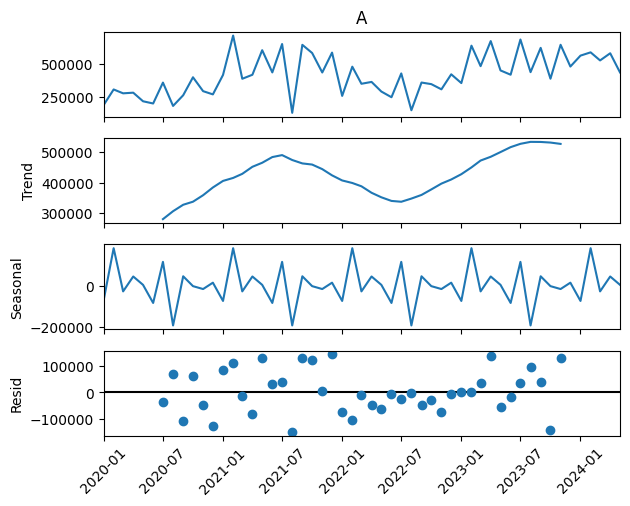

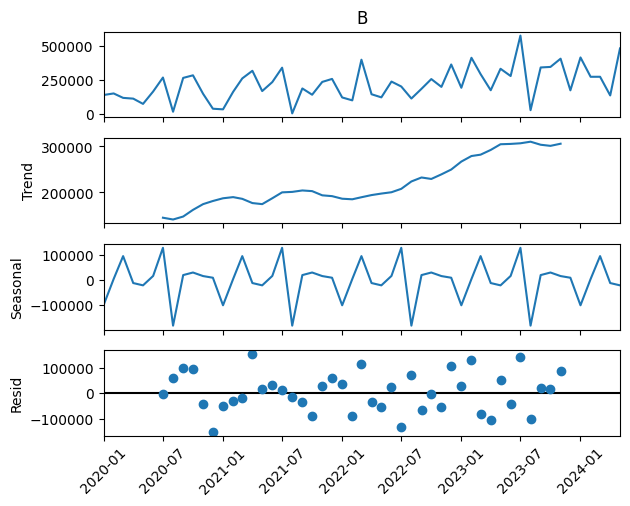

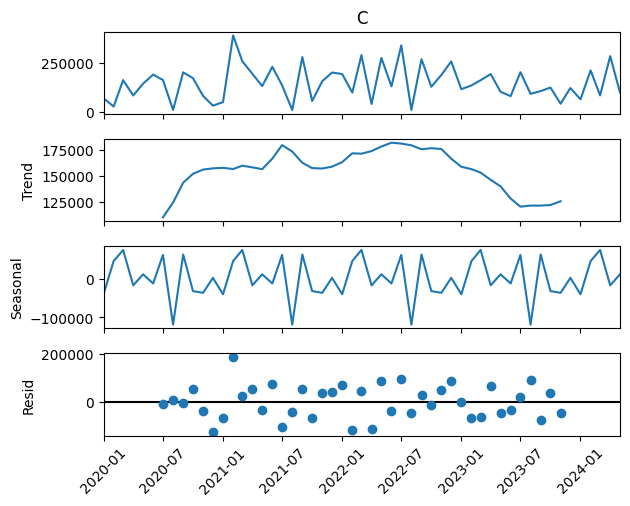

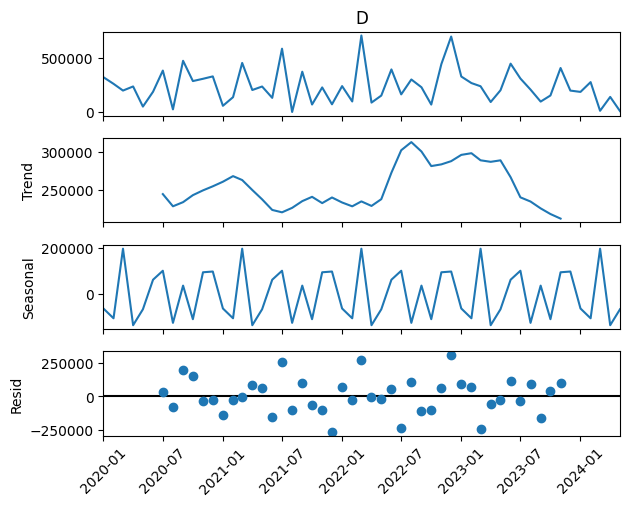

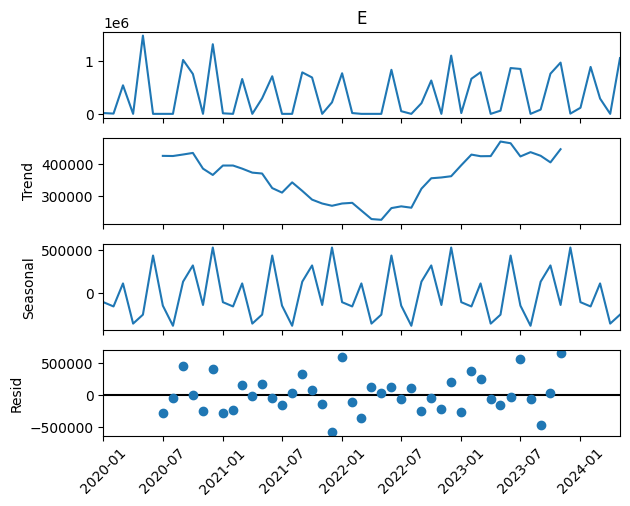

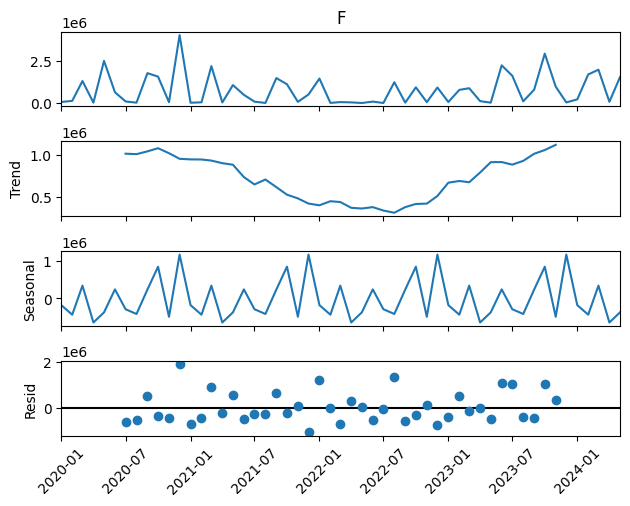

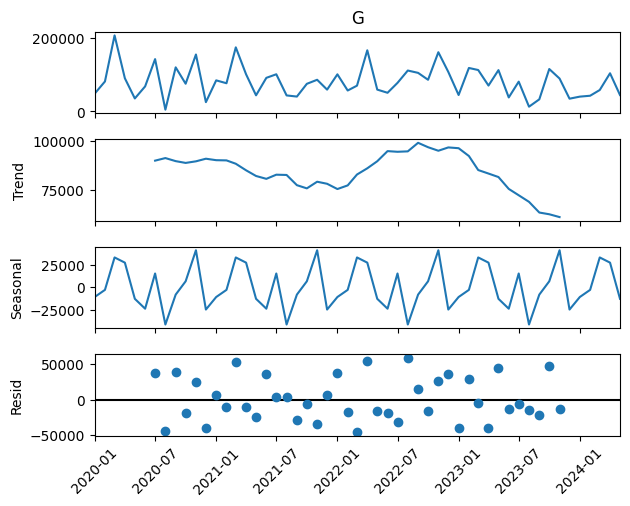

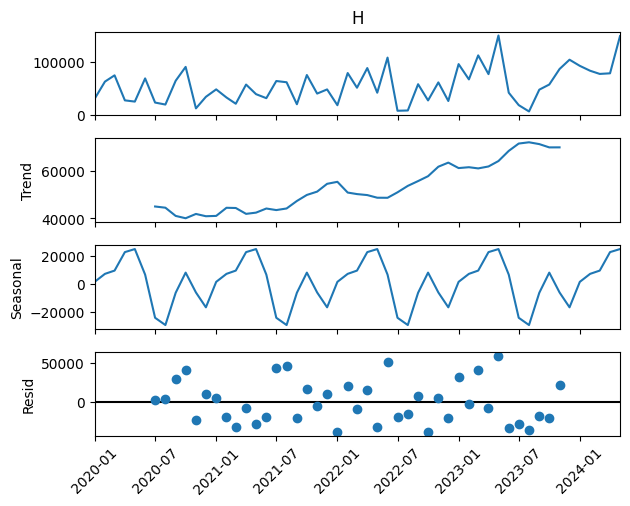

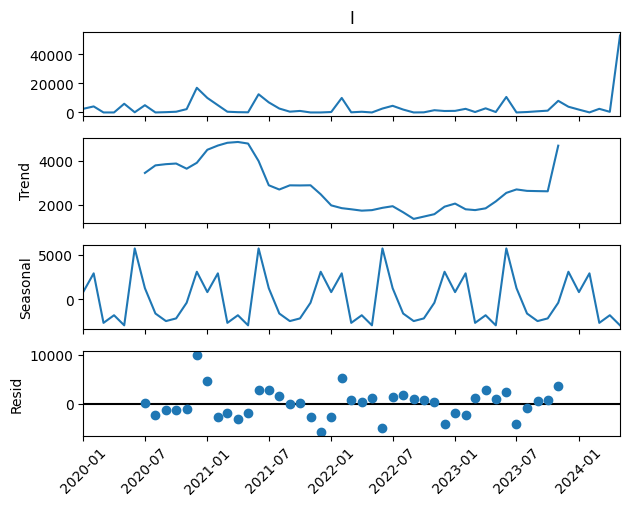

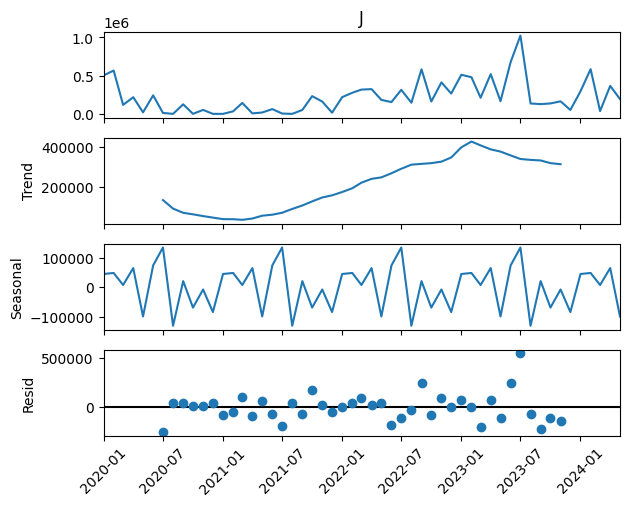

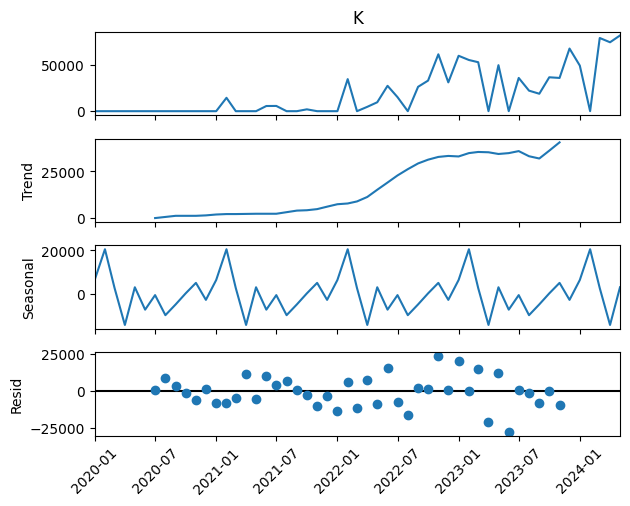

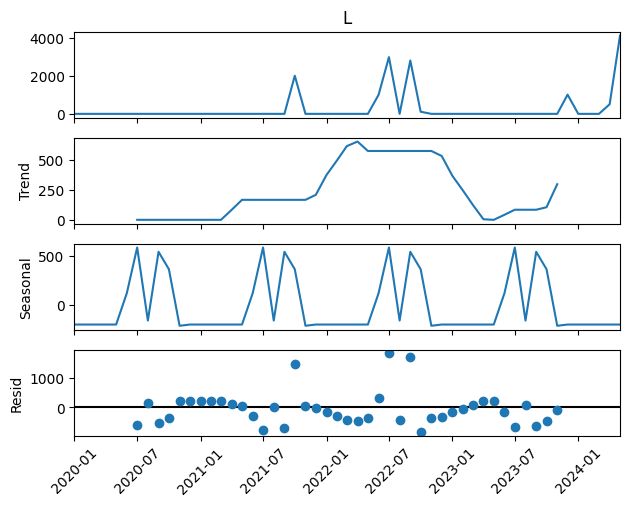

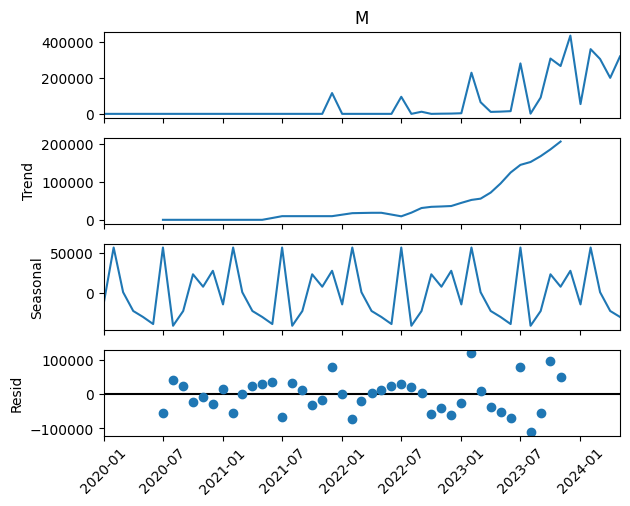

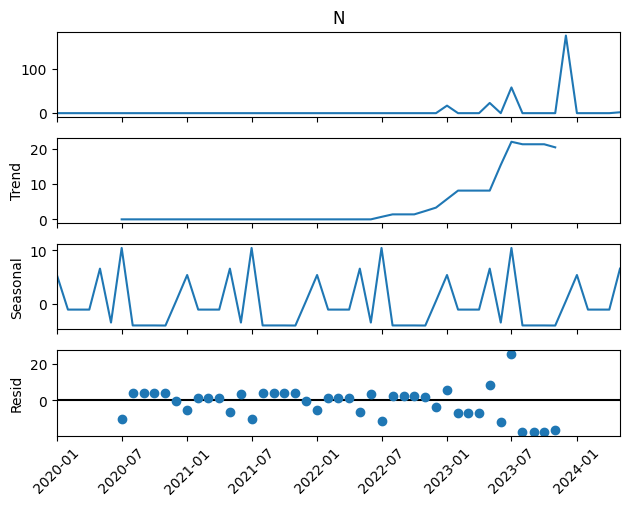

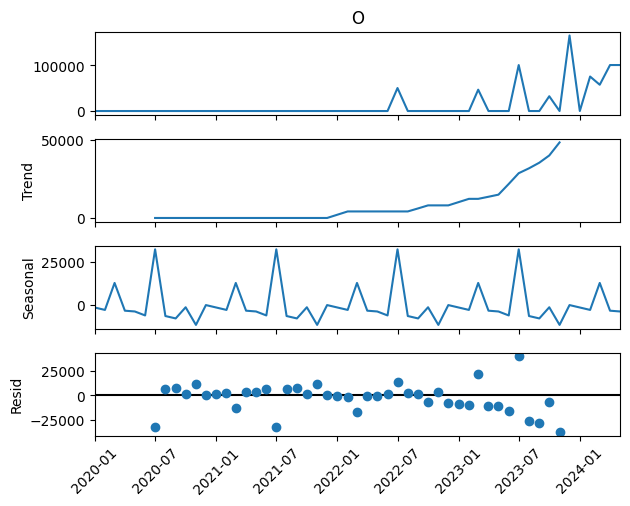

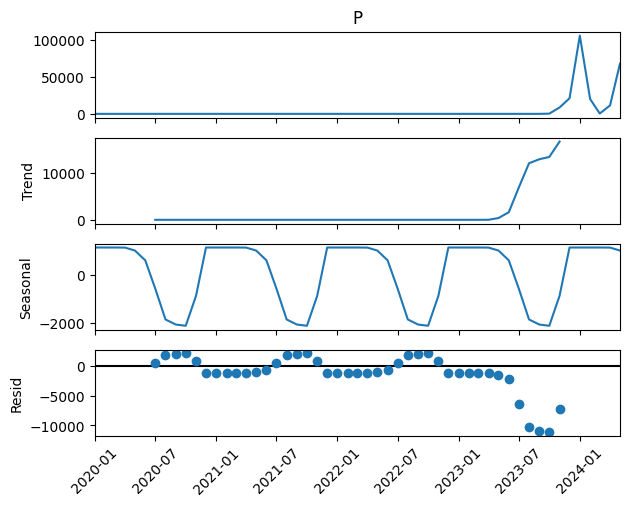

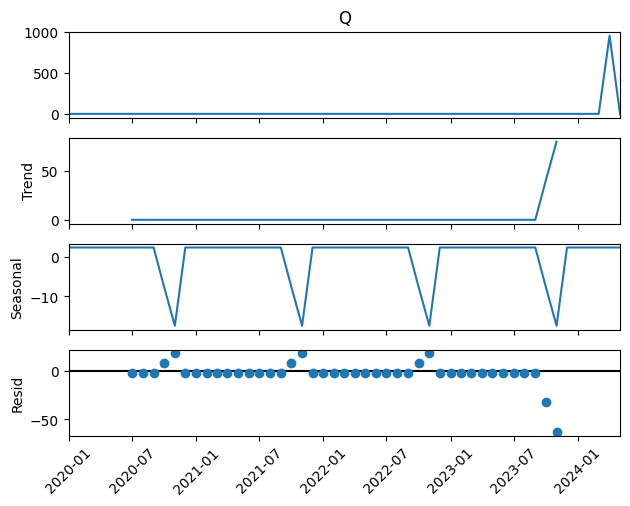

In [ ]:
for family in dforig.columns:
    # Décomposer la série temporelle pour extraire la saisonnalité
    decompositionadd = seasonal_decompose(df2[family], model='additive', period=12) 
    decompositionadd.plot().suptitle('', fontsize=22)
    plt.xticks(rotation=45)
    plt.show()